# __<center>Bank Costumer Churn Rate Analysis</center>__

# Objective
Mengelompokkan pelanggan berdasarkan pola penggunaan dan kebiasaan transaksi mereka. Dengan melakukan klasterisasi, perusahaan kartu kredit dapat mengidentifikasi segmen-segmen pelanggan yang memiliki karakteristik serupa, seperti frekuensi pembelian, penggunaan pembayaran tunai di muka, dan tingkat pembayaran minimum. Hal ini memungkinkan perusahaan untuk merancang strategi pemasaran yang lebih efektif, memberikan penawaran yang lebih tepat sasaran, dan meningkatkan layanan pelanggan. Selain itu, klasterisasi juga dapat membantu dalam mendeteksi perilaku anomali atau potensi risiko, sehingga perusahaan dapat mengambil tindakan pencegahan yang sesuai.


# **ii. SQL Query**

``` python
from google.colab import auth
from google.cloud import bigquery

# Authenticate
auth.authenticate_user()
print('Authenticated')

# Correct project ID
project_id = "dani017"
client = bigquery.Client(project=project_id)

# Run the query
'''
MOD(CUST_ID, 2): Fungsi MOD digunakan untuk menghitung sisa pembagian dari CUST_ID dengan 2. Dengan kata lain, MOD(CUST_ID, 2) akan mengembalikan 0 jika CUST_ID adalah bilangan genap, dan akan mengembalikan 1 jika CUST_ID adalah bilangan ganjil.

!= 0: Operator != berarti "tidak sama dengan". Jadi, != 0 berarti nilai yang dihasilkan dari MOD(CUST_ID, 2) tidak boleh sama dengan 0.
'''
query = '''
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_017_hck.credit-card-information`
WHERE MOD(CUST_ID, 2) != 0 
'''

# Fetch the data into a dataframe
df = client.query(query).to_dataframe()

# Save the DataFrame to a CSV file
csv_filename = 'P1G5_Set_1_Ahmad_Dani.csv'
df.to_csv(csv_filename, index=False)

# Display the first 10 rows of the DataFrame
print("First 10 rows of the dataset:")
print(df.head(10))

# Display the last 10 rows of the DataFrame
print("\nLast 10 rows of the dataset:")
print(df.tail(10))

# **iii. Import Library**

In [1]:
# Modul Data Loading
import pandas as pd
import numpy as np

# Modul EDA
import matplotlib.pyplot as plt
import seaborn as sns
from phik.report import plot_correlation_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

# Modul Feature Engineering
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Modul Machine Learning Modeling
from sklearn.decomposition import PCA

# Menyimpan Model
import pickle
from joblib import dump, load
import json

# Mengindentifaksi peringatan
import warnings
warnings.filterwarnings('ignore')

### **Informasi Data**

| **Column Name** | **Data Type** | **Description** |
| --- | --- | --- |
| CUSTID | Object | Identifikasi pemegang kartu kredit |
| BALANCE | Float | Jumlah saldo yang tersisa di akun untuk melakukan pembelian |
| BALANCEFREQUENCY | Float | Seberapa sering saldo diperbarui, nilai antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui) |
| PURCHASES | Float | Jumlah pembelian yang dilakukan dari akun |
| ONEOFFPURCHASES | Float | Jumlah maksimum pembelian yang dilakukan dalam satu kali transaksi |
| INSTALLMENTSPURCHASES | Float | Jumlah pembelian yang dilakukan dengan cicilan |
| CASH ADVANCE | Float | Uang muka yang diberikan oleh pengguna |
| PURCHASESFREQUENCY | Float | Seberapa sering pembelian dilakukan, nilai antara 0 dan 1 (1 = sering membeli, 0 = tidak sering membeli) |
| ONEOFFPURCHASESFREQUENCY | Float | Seberapa sering pembelian dilakukan dalam satu kali transaksi, nilai antara 0 dan 1 (1 = sering membeli, 0 = tidak sering membeli) |
| PURCHASESINSTALLMENTSFREQUENCY | Float | Seberapa sering pembelian dengan cicilan dilakukan, nilai antara 0 dan 1 (1 = sering dilakukan, 0 = tidak sering dilakukan) |
| CASHADVANCEFREQUENCY | Float | Seberapa sering uang muka dibayar, nilai antara 0 dan 1 (1 = sering dibayar, 0 = tidak sering dibayar) |
| CASHADVANCETRX | Integer | Jumlah transaksi yang dilakukan dengan "uang muka" |
| PURCHASESTRX | Integer | Jumlah transaksi pembelian yang dilakukan |
| CREDIT LIMIT | Float | Batas kredit kartu untuk pengguna |
| PAYMENTS | Float | Jumlah pembayaran yang dilakukan oleh pengguna |
| MINIMUM_PAYMENTS | Float | Jumlah pembayaran minimum yang dilakukan oleh pengguna |
| PRCFULLPAYMENT | Float | Persentase pembayaran penuh yang dilakukan oleh pengguna |
| TENURE | Integer | Masa layanan kartu kredit untuk pengguna |


### **Daftar Konten**
```python
iv.     Data Loading
v.      Exploratory Data Analysis 
vi.     Feature Engineering
vii.    Model Definition
viii.   Model Training
ix.     Model Evaluation
x.      Model Saving
xi.     Model Inference
xii.    Kesimpulan
```

# **iv. Data Loading**

**Menampilkan isi dataset**

In [2]:
# Menampilkan dataset 
dataset = pd.read_csv('P1G6_Set_1_Ahmad_Dani.csv')
display(dataset.head(),dataset.tail())

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185              0.125      45.00             45.00   
1     5069    0.000000              0.000     176.03            176.03   
2     6075  757.964752              0.875     157.40            157.40   
3     6291  264.566591              0.375    1150.00           1150.00   
4     7755  440.613643              1.000     600.00            600.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                               0.0   
1                       0.125                               0.0   
2                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN               0.0       8  
1     0.000000               NaN               0.0       8  
2  1494.480376       2638.598410               0.0       8  
3  3029.380326         85.428885               0.0       8  
4   215.316424        137.846006               0.0       8

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4470     2345  9629.808851                1.0        0.0               0.0   
4471     6785  1040.030221                1.0        0.0               0.0   
4472     7347  1322.818587                1.0        0.0               0.0   
4473     8447  1060.391273                1.0        0.0               0.0   
4474     1995  3447.674222                1.0      205.0             205.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4470  2468.988022       2134.295731               0.0      11  
4471   290.129620        287.994171               0.0      11  
4472  1035.627320        312.835530               0.0      11  
4473   407.360560        277.084736               0.0      11  
4474   665.239171        817.844662               0.0      11

**Melihat informasi kolom**

In [3]:
# Melihat informasi kolom
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA


-   Dataset terdiri dari 44755 baris dan 18 kolom.
-   Terdapat 14 fitur yang valuesnya bertipe float dan 6 bertype integer.
-   Tidak terdapat missing values.

**Melihat nilai statistik dari setiap kolom**

In [4]:
# Mengecek statistik sederhana dataset
dataset.describe().T

count         mean          std        min  \
CUST_ID                           4475.0  4475.000000  2583.931114   1.000000   
BALANCE                           4475.0  1563.205717  2072.045789   0.000000   
BALANCE_FREQUENCY                 4475.0     0.876933     0.238222   0.000000   
PURCHASES                         4475.0  1003.251343  2060.034730   0.000000   
ONEOFF_PURCHASES                  4475.0   596.369893  1653.425984   0.000000   
INSTALLMENTS_PURCHASES            4475.0   407.110215   880.799744   0.000000   
CASH_ADVANCE                      4475.0   984.288554  2060.448056   0.000000   
PURCHASES_FREQUENCY               4475.0     0.490579     0.402907   0.000000   
ONEOFF_PURCHASES_FREQUENCY        4475.0     0.202301     0.298203   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  4475.0     0.363886     0.397603   0.000000   
CASH_ADVANCE_FREQUENCY            4475.0     0.136132     0.201036   0.000000   
CASH_ADVANCE_TRX                  4475.0     3.301229     7.134727   0.000000   
PURCHASES_TRX                     4475.0    14.929162    25.540814   0.000000   
CREDIT_LIMIT                      4475.0  4494.878630  3609.267706  50.000000   
PAYMENTS                          4475.0  1740.075430  2827.633858   0.000000   
MINIMUM_PAYMENTS                  4320.0   873.976757  2436.877272   0.019163   
PRC_FULL_PAYMENT                  4475.0     0.150224     0.289081   0.000000   
TENURE                            4475.0    11.518212     1.328925   6.000000   

                                          25%          50%          75%  \
CUST_ID                           2238.000000  4475.000000  6712.000000   
BALANCE                            124.432849   871.355430  2047.570799   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.560000   360.000000  1102.420000   
ONEOFF_PURCHASES                     0.000000    45.650000   575.220000   
INSTALLMENTS_PURCHASES               0.000000    88.620000   455.885000   
CASH_ADVANCE                         0.000000     0.000000  1138.887754   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.250000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.250000   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           376.913051   877.494612  1911.596530   
MINIMUM_PAYMENTS                   168.590144   313.980229   819.371080   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.125000   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
CUST_ID                            8949.00000  
BALANCE                           18495.55855  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         41050.40000  
ONEOFF_PURCHASES                  40624.06000  
INSTALLMENTS_PURCHASES            14686.10000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       347.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

Berdasarkan hasil perhitungan statistik sederhana, hampir semua fitur memiliki nilai rata-rata yang jauh dari nilai maksimum, yang artinya kemungkinan data tidak terdistribusi normal sehingga akan dilakukan pengecekan lebih lanjut.

**Melihat jumlah persentasi missing valuedari seluruh data**

In [5]:
# Persentase missing value
dataset.isna().sum()/dataset.shape[0]*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000000
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.463687
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Dari data diatas adanya missing value dari kolom MINIMUM_PAYMENTS 3.4%. Ini nanti akan kita hapus untuk mempermudah kita dalam melakukan proses selanjutnya.

**Melihat lebih detail missing value**

In [6]:
# Melihat angka pasti missing value
dataset.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Dari data diatas kita memiliki data yang konsisten 4475 baris, 18 kolom dan 155 missing values di Minimum_payment

**Melihat isi dari setiap kolom**

In [7]:
# Melihat isi kolom
dataset.count()

CUST_ID                             4475
BALANCE                             4475
BALANCE_FREQUENCY                   4475
PURCHASES                           4475
ONEOFF_PURCHASES                    4475
INSTALLMENTS_PURCHASES              4475
CASH_ADVANCE                        4475
PURCHASES_FREQUENCY                 4475
ONEOFF_PURCHASES_FREQUENCY          4475
PURCHASES_INSTALLMENTS_FREQUENCY    4475
CASH_ADVANCE_FREQUENCY              4475
CASH_ADVANCE_TRX                    4475
PURCHASES_TRX                       4475
CREDIT_LIMIT                        4475
PAYMENTS                            4475
MINIMUM_PAYMENTS                    4320
PRC_FULL_PAYMENT                    4475
TENURE                              4475
dtype: int64

Dari data diatas hanya kolom MINIMUM_PAYMENTS yang memiliki missing value yang menyebabkan nilai data tidak sama dengan kolom yang lain.

In [8]:
# Duplikasi data
dataset1 = dataset.copy()

dataset1.head()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185              0.125      45.00             45.00   
1     5069    0.000000              0.000     176.03            176.03   
2     6075  757.964752              0.875     157.40            157.40   
3     6291  264.566591              0.375    1150.00           1150.00   
4     7755  440.613643              1.000     600.00            600.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                               0.0   
1                       0.125                               0.0   
2                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN               0.0       8  
1     0.000000               NaN               0.0       8  
2  1494.480376       2638.598410               0.0       8  
3  3029.380326         85.428885               0.0       8  
4   215.316424        137.846006               0.0       8

**Melihat dan menghapus data duplikat**

In [9]:
# Melihat baris duplikat
duplicates_df = dataset1[dataset1.duplicated()]
print("Data duplikat:")
print(duplicates_df)

# Menghapus baris duplikat
dataset1 = dataset1.drop_duplicates()
print("Dataset setelah menghapus duplikat:")
print(dataset1)

Data duplikat:
Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []
Dataset setelah menghapus duplikat:
      CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3091     3.833185              0.125      45.00             45.00   
1        5069     0.000000              0.000     176.03            176.03   
2        6075   757.964752              0.875     157.40            157.40   
3        6291   264.566591              0.375    1150.00           1150.00   
4        7755   440.613643              1.000     600.00            600.00   
...       ...          ...                ...        ...               ...   
4470     2345  9629.808851              1.000       0.0

Dari data diatas tidak ditemukkannya data duplikat ini akan memudahkan kita untuk melakukan proses selanjutnya

# **v. Exploratory Data Analysis** 

Tujuan cardinality mengetahui nilai - nilai dalam dataset untuk nantinya kolom - kolom itu akan kita lakukan pembersihan yang tujuannya untuk mempermudah saat melakukan modelling. Berikut adalah tahap - tahapannya:
* Melihat distribusi data
* Melihat kolerasi antar kolom

**Melihat cardinality dari semua kolom**

In [10]:
# Membuat list untuk menyimpan data
cardinality_dict = []

# Menghitung dan menyimpan cardinality untuk setiap kolom
for column in dataset1.columns:
    cardinality = dataset1[column].nunique()
    cardinality_dict.append({'Column Name': column, 'Cardinality': cardinality})

# Membuat DataFrame dari list
cardinality_df = pd.DataFrame(cardinality_dict)

# Menyortir DataFrame berdasarkan kardinalitas (Cardinality) secara menurun
sorted_cardinality_df = cardinality_df.sort_values(by='Cardinality', ascending=False)

# Menampilkan DataFrame yang telah disortir
print("Cardinality Kolom")
print(sorted_cardinality_df.to_string())

Cardinality Kolom
                         Column Name  Cardinality
0                            CUST_ID         4475
1                            BALANCE         4433
14                          PAYMENTS         4362
15                  MINIMUM_PAYMENTS         4319
3                          PURCHASES         3203
5             INSTALLMENTS_PURCHASES         2292
6                       CASH_ADVANCE         2169
4                   ONEOFF_PURCHASES         2093
13                      CREDIT_LIMIT          158
12                     PURCHASES_TRX          150
11                  CASH_ADVANCE_TRX           52
10            CASH_ADVANCE_FREQUENCY           51
16                  PRC_FULL_PAYMENT           47
9   PURCHASES_INSTALLMENTS_FREQUENCY           47
7                PURCHASES_FREQUENCY           46
8         ONEOFF_PURCHASES_FREQUENCY           45
2                  BALANCE_FREQUENCY           43
17                            TENURE            7


- Terlihat fitur yang memiliki kardinalitas tinggi yaitu yang memiliki nilai unik tinggi. Fitur yang memiliki kardinalitas tinggi yaitu **CUST_ID**, kemudian diikuti oleh **BALANCE**, dan **PAYMENTS** karena memiliki nilai unique ribuan.
- Fitur yang memiliki kardinalitas rendah seperti **TENURE** biasanya merupakan kolom kategorikal.

**Melihat persebaran data dan hubungan antara kolom tenure dan credit limit**

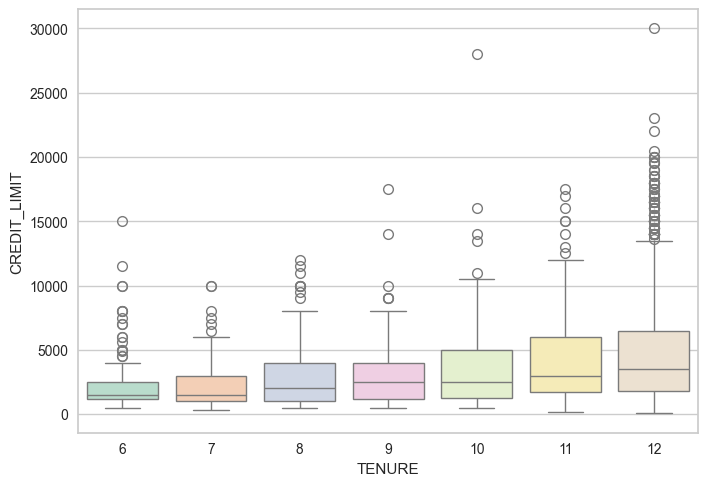

In [11]:
# Menapilkan sebuah box plot
sns.boxplot(x = 'TENURE', y = 'CREDIT_LIMIT', 
            data = dataset1,palette='Pastel2');

* Batas kredit (CREDIT_LIMIT) cenderung meningkat seiring dengan bertambahnya masa layanan kartu kredit (TENURE).
* Terdapat lebih banyak variabilitas dalam batas kredit untuk pelanggan dengan masa layanan yang lebih panjang.
* Ada beberapa pelanggan dengan batas kredit yang sangat tinggi, terutama bagi mereka yang memiliki masa layanan yang lebih panjang.

**Melihat persebaran data dan hubungan antara kolom prc full payment dan credit limit**

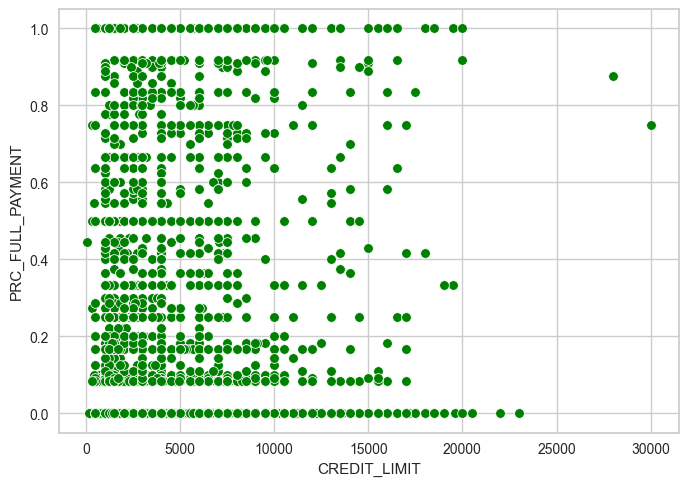

In [12]:
# Menampilkan hubungan antar kolom
sns.scatterplot(x='CREDIT_LIMIT', y='PRC_FULL_PAYMENT', 
                data=dataset1,color='green');

* Sebagian besar pengguna memiliki batas kredit di bawah 10,000 dolar dan persentase pembayaran penuh yang bervariasi.
* Tidak ada korelasi yang jelas antara batas kredit dan persentase pembayaran penuh. Pengguna dengan berbagai batas kredit memiliki kebiasaan pembayaran yang berbeda-beda.
* Ada beberapa pengguna dengan batas kredit tinggi yang cenderung melakukan pembayaran penuh lebih sering, tetapi ini adalah pengecualian dan bukan aturan umum.

**Melihat persebaran data dan hubungan antara kolom tenure dan balance frequency**

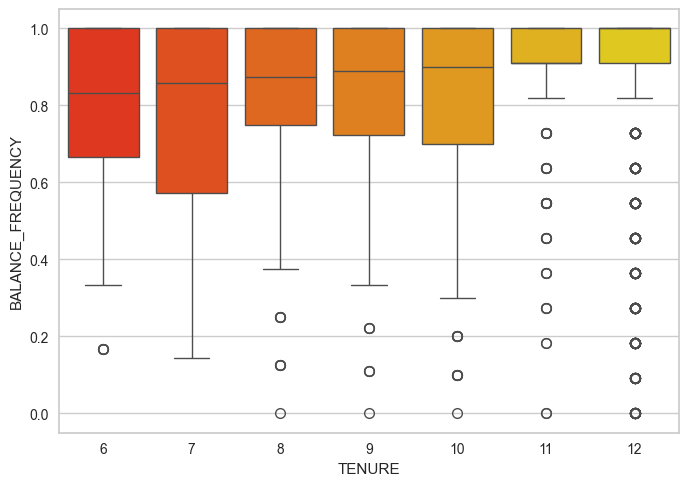

In [13]:
# Menampilkan hubungan antara TENURE dengan BALANCE_FREQUENCY
sns.boxplot(x = 'TENURE', y = 'BALANCE_FREQUENCY', 
            data = dataset1,palette='autumn');

* Frekuensi pembaruan saldo (BALANCE_FREQUENCY) cenderung tinggi untuk semua pengguna, terlepas dari masa layanan kartu kredit (TENURE).
* Terdapat beberapa variasi dalam BALANCE_FREQUENCY, terutama untuk pengguna dengan masa layanan antara 6 hingga 10 tahun.
* Pengguna dengan TENURE yang lebih tinggi cenderung memiliki frekuensi pembaruan saldo yang lebih konsisten dan tinggi, meskipun masih ada beberapa pencilan dengan frekuensi yang sangat rendah.

**Melihat persebaran data dan hubungan antara kolom balance dan purchase**

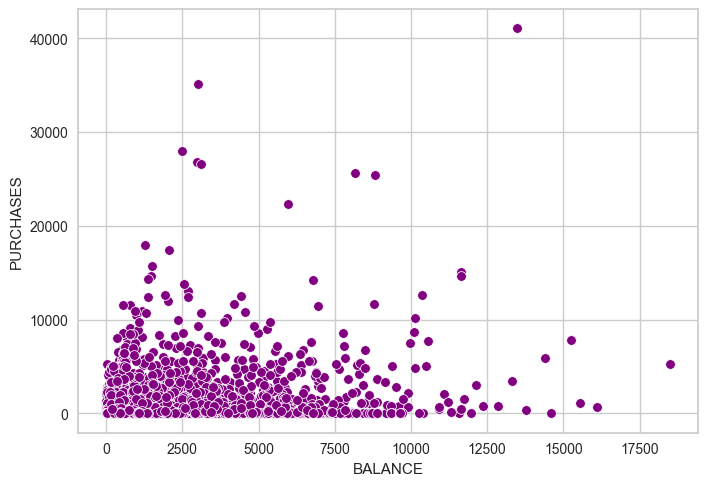

In [14]:
# Melihat hubungan antara BALANCE dan PURCHASES
sns.scatterplot(x='BALANCE', y='PURCHASES', 
                data=dataset1,color='purple');

* Sebagian besar pengguna memiliki saldo di bawah 10,000 dolar dan jumlah pembelian di bawah 10,000 dolar.
* Tidak ada korelasi yang jelas antara saldo (BALANCE) dan jumlah pembelian (PURCHASES). Pengguna dengan saldo yang rendah maupun tinggi dapat memiliki jumlah pembelian yang bervariasi.
* Ada beberapa pengguna dengan jumlah pembelian yang sangat tinggi, yang merupakan pencilan dibandingkan dengan sebagian besar data.

**Melihat persebaran data dari kolom balance**

Text(0.5, 0, 'Balance')

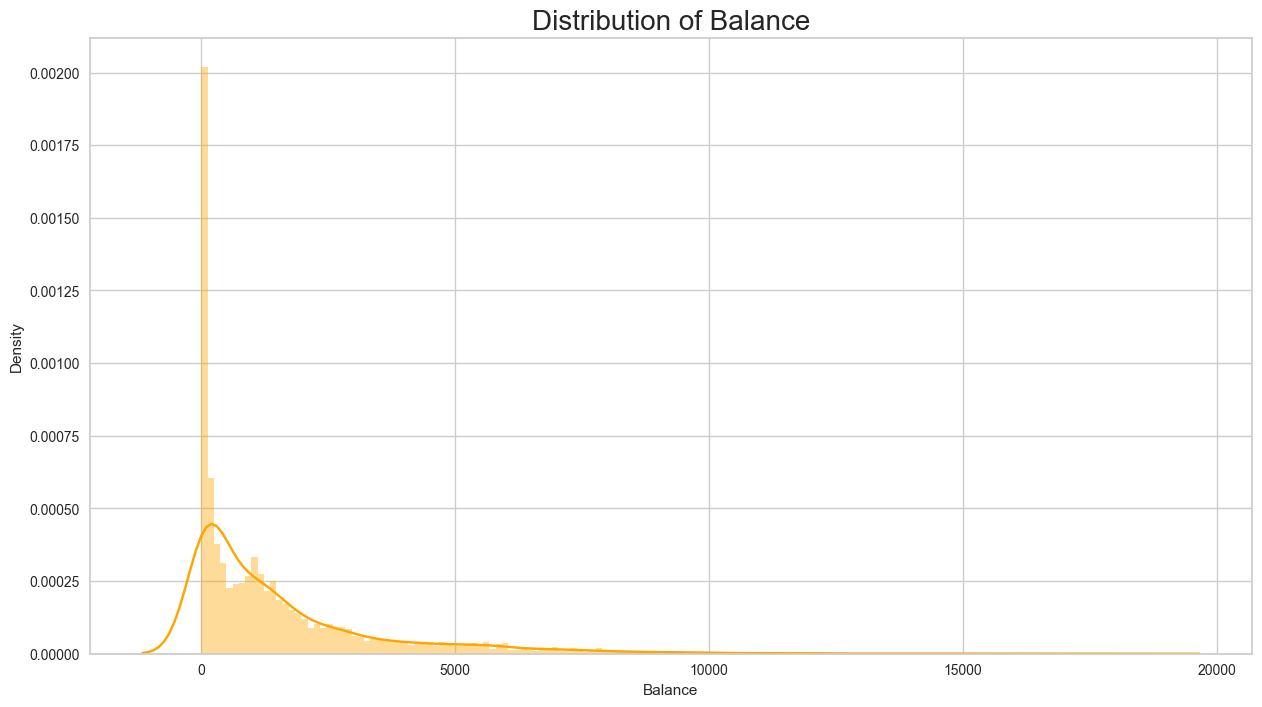

In [15]:
# Melihat distribusi data numerikal dari kolom balance 
plt.rcParams['figure.figsize'] = (15,8)

sns.distplot(dataset1['BALANCE'],bins=150, color='orange')
plt.title('Distribution of Balance', size=20)
plt.xlabel('Balance')

 Distribusi jumlah saldo yang dimiliki pelanggan di perusahaan pada rentang 0 - 20.000. Grafik ini mengungkapkan bahwa banyak pelanggan memiliki saldo 0 pada kartu kredit mereka, yang berarti jumlah kartu kredit dengan saldo nol sangat tinggi. Konsep "kartu saldo nol" adalah strategi di mana pemegang kartu menjaga saldo mereka tetap rendah, atau dalam hal ini nol, tetapi mempertahankan batas kredit yang tinggi. Dengan menjaga saldo yang sangat rendah sementara batas kredit tetap tinggi, pemegang kartu dapat meningkatkan rasio pemanfaatan kredit mereka. Rasio pemanfaatan kredit yang lebih rendah dianggap positif oleh lembaga kredit, karena menunjukkan bahwa pemegang kartu tidak menggunakan seluruh batas kredit yang tersedia. 

Strategi ini pada akhirnya bertujuan untuk meningkatkan skor kredit pemegang kartu. Skor kredit yang lebih tinggi dapat memberikan berbagai manfaat, seperti mendapatkan suku bunga yang lebih rendah pada pinjaman dan akses yang lebih mudah ke produk kredit lainnya. Oleh karena itu, banyak pelanggan mungkin secara aktif memilih untuk menjaga saldo kartu kredit mereka nol sebagai bagian dari strategi manajemen kredit yang lebih luas.

Dalam konteks perusahaan, tingginya jumlah kartu dengan saldo nol juga bisa mencerminkan tingkat kedisiplinan keuangan pelanggan atau keberhasilan program edukasi keuangan yang mendorong pelanggan untuk menjaga saldo rendah demi keuntungan kredit jangka panjang.

**Melihat persebaran data dari kolom purchase**

Text(0.5, 0, 'Purchases')

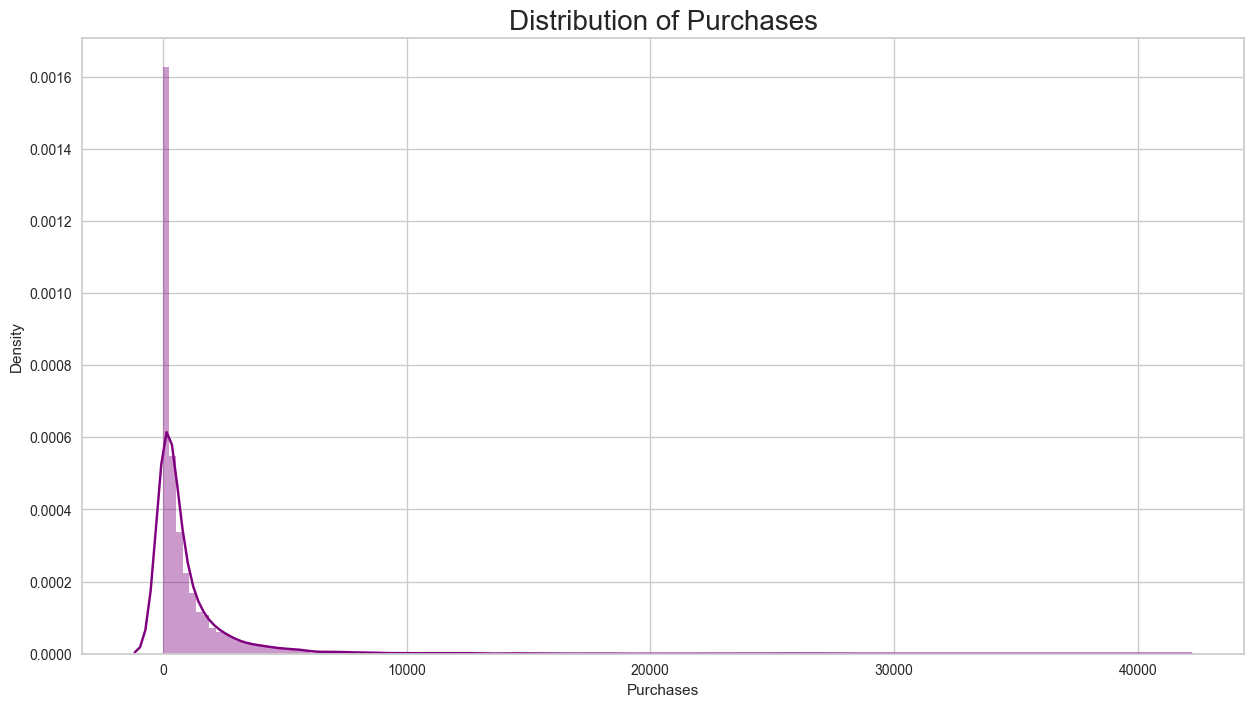

In [16]:
# Melihat distribusi kolom purchase
plt.rcParams['figure.figsize'] = (15,8)

sns.distplot(dataset1['PURCHASES'], color='purple', bins=150)
plt.title('Distribution of Purchases', size=20)
plt.xlabel('Purchases')

Banyak orang melakukan pembelian nol atau mereka tidak melakukan transaksi sama sekali karena kami juga melihat banyak yang memiliki saldo kartu nol. Dan ini selaras dengan saldo credit mereka yang nilainya hanya 0.

**Melihat score persebaran data dari semua kolom**

Text(0.5, 1.0, 'Counts of Balance Frequency Score')

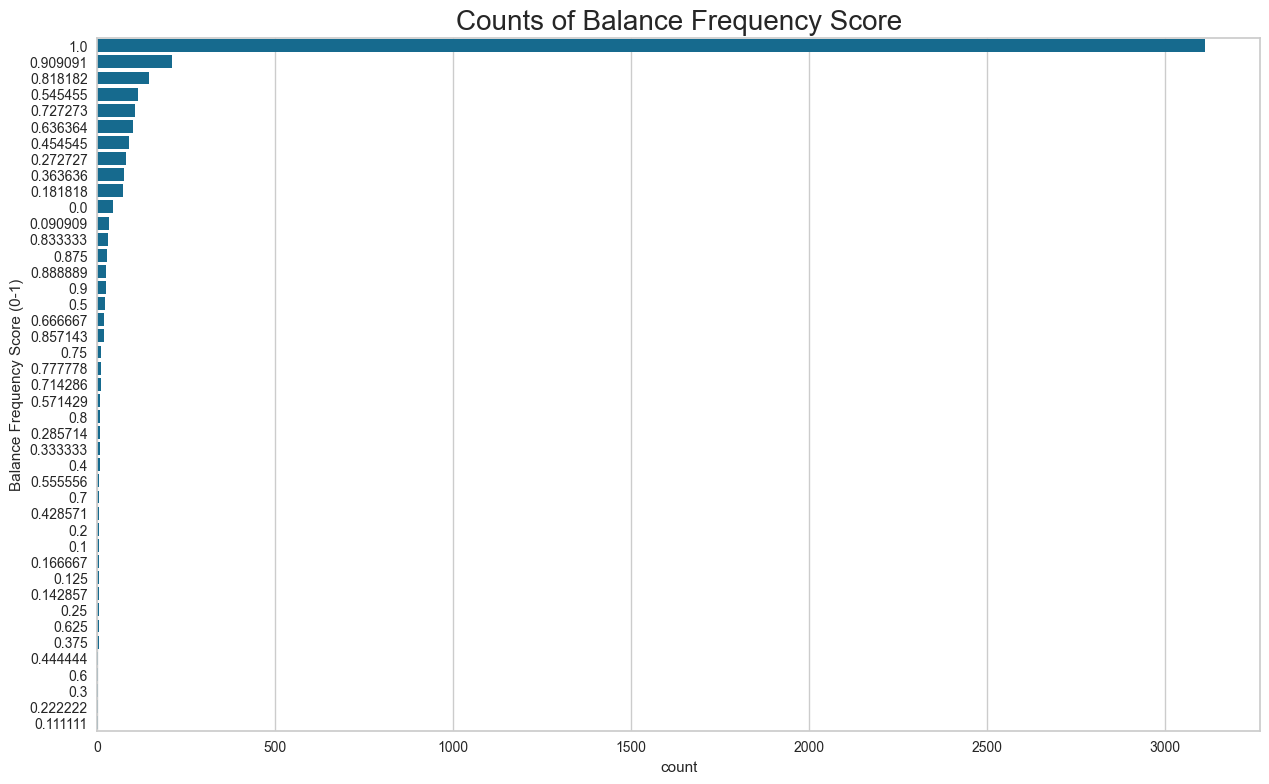

In [17]:
# Melihat distribusi data numerikal dari kolom balance frequency
plt.rcParams['figure.figsize'] = (15,9)

sns.countplot(y=dataset1['BALANCE_FREQUENCY'],order = dataset1['BALANCE_FREQUENCY'].value_counts(10).index)
plt.ylabel('Balance Frequency Score (0-1)')
plt.title('Counts of Balance Frequency Score', fontsize=20)

Frekuensi saldo adalah skor antara 0 dan 1 yang diberikan kepada akun berdasarkan seberapa sering saldo akun diperbarui, dengan skor 1 menunjukkan pembaruan yang paling sering. Skor ini pada dasarnya mengukur seberapa sering orang menggunakan kartu kredit mereka. Seperti yang terlihat di sini, sebagian besar akun memiliki skor satu, yang merupakan skor tertinggi. Ini menunjukkan bahwa sebagian besar orang sering menggunakan kartu kredit mereka, sementara hanya sedikit yang relatif jarang menggunakannya.

**Melihat kolerasi antar kolom**

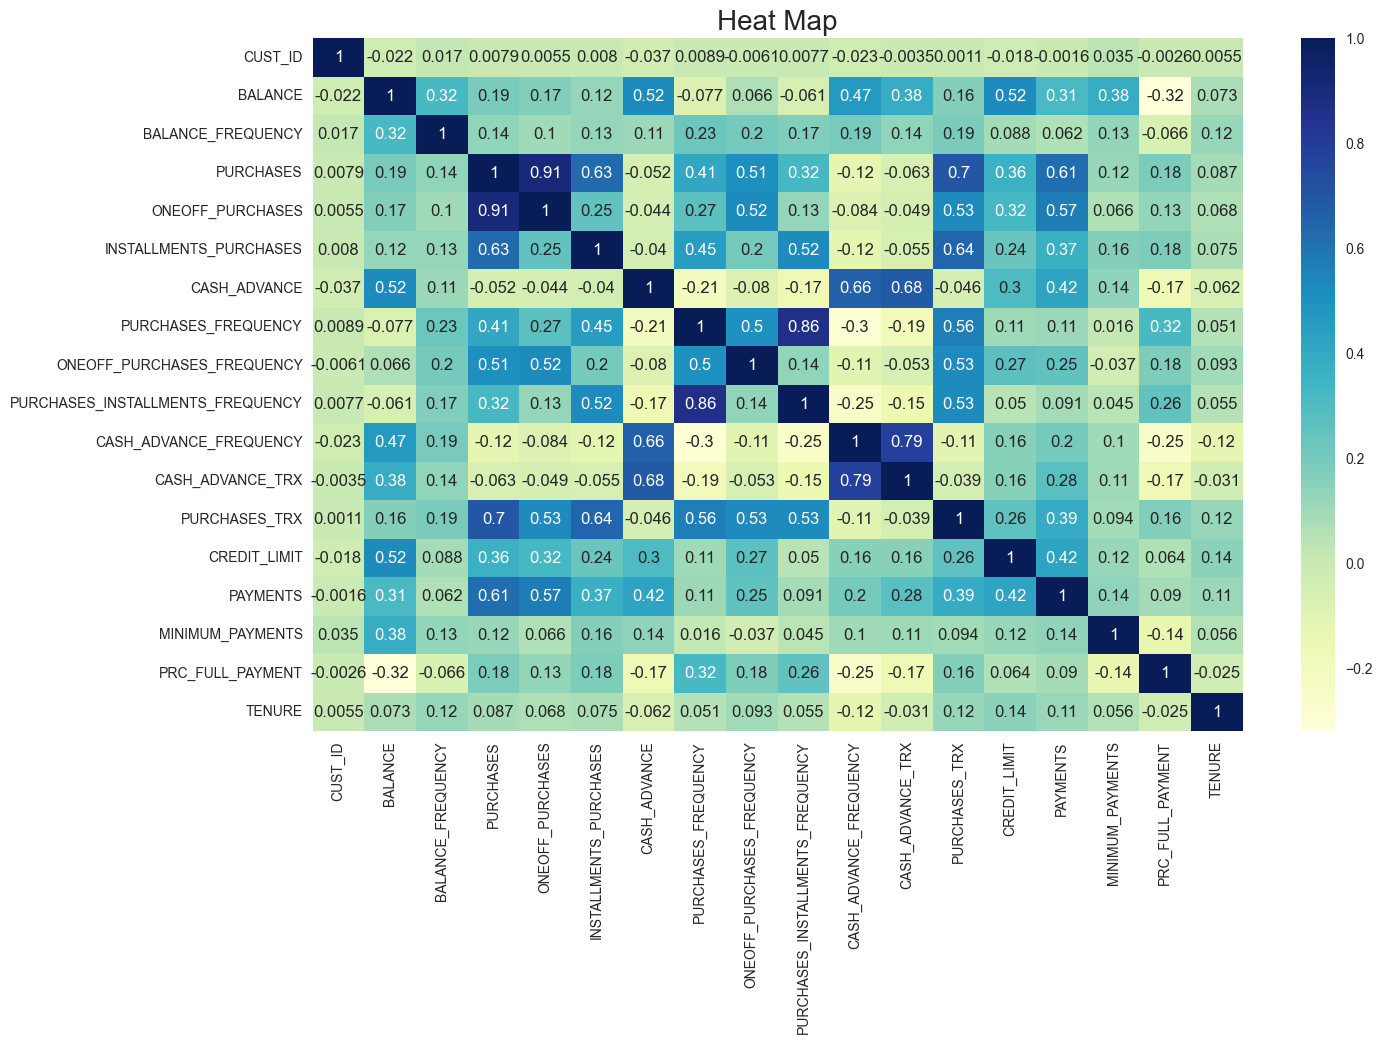

In [18]:
# Melihat kolerasi antar kolom
correlation_matrix = dataset1.corr()

# Menggambar heatmap
sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=True)

# Menambahkan judul
plt.title('Heat Map', fontsize=20)

# Menampilkan plot
plt.show()

terdapat korelasi yang sangat tinggi antara variabel pembelian secara umum dan pembelian satu kali, yaitu sebesar 0,91. Korelasi ini sesuai dengan yang kita harapkan karena pembelian satu kali merupakan bagian dari total pembelian. Hal serupa juga berlaku untuk variabel yang berhubungan dengan transaksi cash advance. Contohnya, terdapat korelasi sebesar 0,79 antara jumlah transaksi cash advance dengan frekuensi penggunaannya.

Namun, tidak semua variabel menunjukkan hubungan yang kuat. Misalnya, variabel neraca dan pembayaran menunjukkan korelasi yang rendah. Hal ini mungkin disebabkan oleh berbagai faktor eksternal atau internal yang mempengaruhi masing-masing variabel secara berbeda.

**Melihat outlier dari semua kolom**

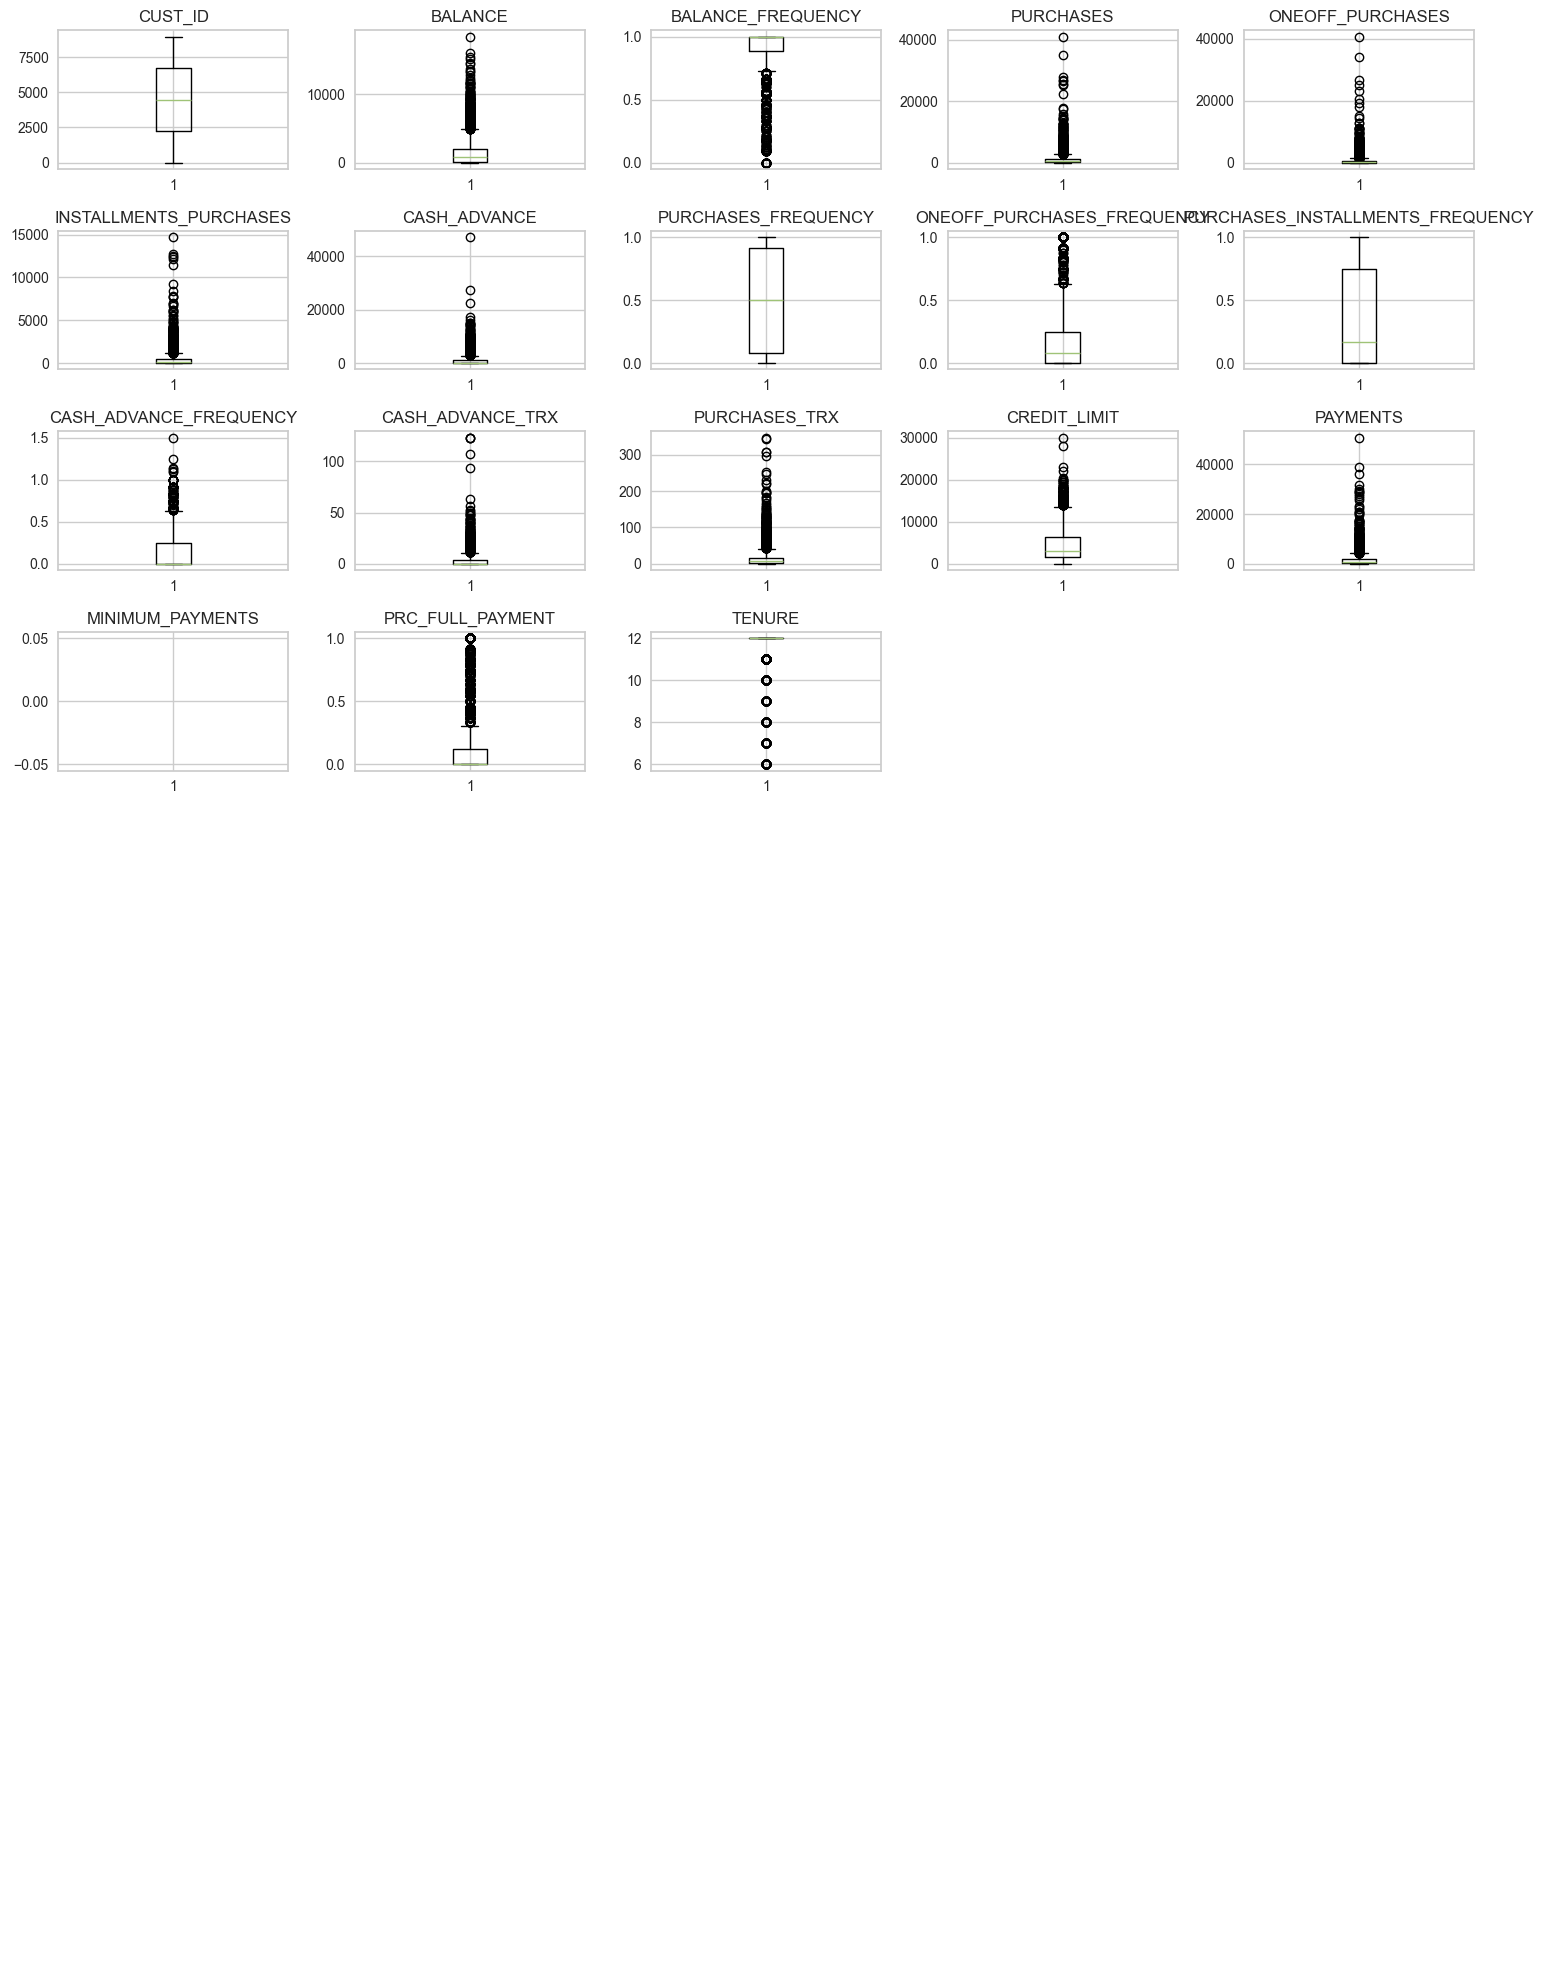

In [19]:
# Mengidentifikasi kolom numerik
kolom_numerik = dataset1.select_dtypes(include=['number']).columns

# Menentukan ukuran plot
fig, sumbu = plt.subplots(10, 5, figsize=(15, 20))
sumbu = sumbu.flatten()

# Membuat boxplot untuk setiap kolom numerik
for idx, kolom in enumerate(kolom_numerik):
    sumbu[idx].boxplot(dataset1[kolom])
    sumbu[idx].set_title(kolom)
    
# Menonaktifkan plot yang tidak terpakai
for idx_sisa in range(len(kolom_numerik), len(sumbu)):
    sumbu[idx_sisa].axis('off')

# Menata layout agar berantakan
plt.tight_layout()

# Menampilkan plot
plt.show()


Dari data diatas bisa kita lihat hampir semua kolom memiliki outlier ini akan kita tangani di feature engineering yang bertujuan untuk kita melakukan proses selanjutnya.

---

**Kesimpulan** 

1. Fitur dengan kardinalitas tinggi, seperti **CUST_ID**, **BALANCE**, dan **PAYMENTS**, memiliki nilai unik yang tinggi, mencapai ribuan.

2. Fitur dengan kardinalitas rendah, seperti **TENURE**, cenderung merupakan kolom kategorikal. **CREDIT_LIMIT** cenderung meningkat seiring dengan bertambahnya masa layanan kartu kredit.

3. Terdapat lebih banyak variasi dalam batas kredit untuk pelanggan dengan masa layanan yang lebih panjang.

4. Meskipun ada beberapa pelanggan dengan batas kredit yang sangat tinggi, sebagian besar pengguna memiliki batas kredit di bawah $10,000 dan beragam dalam persentase pembayaran penuh mereka.

5. Tidak ada korelasi yang jelas antara batas kredit dan persentase pembayaran penuh, menunjukkan kebiasaan pembayaran yang berbeda di antara pengguna.

6. Frekuensi pembaruan saldo (**BALANCE_FREQUENCY**) cenderung tinggi untuk semua pengguna, independen dari masa layanan kartu kredit.

7. Pengguna dengan TENURE yang lebih tinggi cenderung memiliki frekuensi pembaruan saldo yang lebih konsisten, meskipun ada beberapa yang memiliki frekuensi rendah.

8. Tidak ada korelasi yang jelas antara saldo (**BALANCE**) dan jumlah pembelian (**PURCHASES**), menunjukkan variasi dalam kebiasaan pengguna.

9. Ada beberapa pengguna dengan jumlah pembelian yang sangat tinggi, namun ini merupakan pengecualian.

10. Kejadian "kartu saldo nol" muncul di mana banyak pelanggan memilih untuk menjaga saldo kartu kredit mereka rendah atau nol, sementara mempertahankan batas kredit yang tinggi untuk meningkatkan rasio pemanfaatan kredit mereka.

11. Data menunjukkan korelasi yang kuat antara variabel pembelian secara umum dan pembelian satu kali, serta antara transaksi cash advance dengan frekuensi penggunaannya.

12. Beberapa variabel menunjukkan korelasi rendah, mungkin dipengaruhi oleh faktor eksternal atau internal yang berbeda.

Dengan demikian, data ini memberikan kita wawasan untuk dilakukan feature engineering lebih lanjut guna mengatasi outlier dan mempersiapkan data untuk proses selanjutnya.

# **vi. Feature Engineering** 
Tujuan feature engineering menyiapkan data sudah siap untuk melakukan modelling nantinya. Berikut adalah tahap - tahapannya:
* Menghapus kolom yang tidak berpengaruh untuk proses modelling
* Menghapus outlier
* Menghapus missing value


**Menghapus Kolom**

In [20]:
# Menghapus kolom cust_id
dataset1.drop('CUST_ID', axis=1, inplace = True)

In [21]:
# Memastikan kolom sudah terhapus
dataset1.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    3.833185              0.125      45.00             45.00   
1    0.000000              0.000     176.03            176.03   
2  757.964752              0.875     157.40            157.40   
3  264.566591              0.375    1150.00           1150.00   
4  440.613643              1.000     600.00            600.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                               0.0   
1                       0.125                               0.0   
2                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN               0.0       8  
1     0.000000               NaN               0.0       8  
2  1494.480376       2638.598410               0.0       8  
3  3029.380326         85.428885               0.0       8  
4   215.316424        137.846006               0.0       8

Alasan menghapus kolom tersebut :

1. **Tidak Informatif**:
   - **CUST_ID** adalah pengenal unik yang dirancang untuk membedakan setiap pelanggan. Ini tidak membawa informasi yang relevan atau berguna untuk memprediksi variabel target. 

2. **Menghindari Overfitting**:
   - Menyertakan pengenal unik seperti **CUST_ID** dapat menyebabkan model menghafal data daripada belajar pola yang berguna. Ini dapat menyebabkan overfitting, di mana model bekerja sangat baik pada data pelatihan tetapi berkinerja buruk pada data yang tidak terlihat.

3. **Skalabilitas dan Generalisasi**:
   - Model yang dilatih dengan **CUST_ID** cenderung tidak berskala dengan baik ke data baru karena tidak bisa menggeneralisasi pola dari ID unik yang hanya berlaku pada set data tertentu.

4. **Data Leakage**:
   - Ada risiko kebocoran data jika **CUST_ID** secara tidak sengaja memengaruhi model. Bahkan jika tampaknya tidak memiliki informasi, pengenal unik dapat menciptakan pola yang tidak diinginkan yang tidak akan ada pada data baru.

Dengan alasan-alasan ini, menghapus **CUST_ID** sebelum memulai proses pemodelan adalah praktik umum untuk memastikan model yang lebih umum, akurat, dan dapat digeneralisasi.

**Menghapus Missing Value**

In [22]:
# Menghapus outlier 
dataset1['MINIMUM_PAYMENTS'].fillna(dataset1['MINIMUM_PAYMENTS'].median(), inplace=True)

In [23]:
# Mengecek kembali data
dataset1.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Kita sudah berhasil menghapus missing value Terdapat 155 nilai yang kosong pada kolom "MINIMUM_PAYMENT", kita menghapus menggunakan nilai median. Di pilihannya menggunakan nilai median didasarkan pada distribusi data yang cenderung skew, serta fakta bahwa nilai rata-rata dari pembayaran minimumnya tercatat sangat tinggi saat diperiksa.

**Menghapus Outlier**

In [24]:
cat_column = []  # Inisialisasi daftar kolom kategorikal
one_identical_column = []  # Inisialisasi daftar kolom dengan satu nilai identik

# Loop melalui setiap kolom dalam dataset
for i in dataset1.columns:
    # Cek jika kolom memiliki lebih dari satu nilai unik dan kurang dari enam nilai unik
    if len(dataset1[i].drop_duplicates()) > 1 and len(dataset1[i].drop_duplicates()) < 6:
        # Tampilkan nilai-nilai unik dalam kolom
        print(f'List nilai dalam kolom {i} adalah:\n{sorted(dataset1[i].unique())}\n')
        # Tambahkan kolom ke dalam daftar kolom kategorikal
        cat_column.append(i)
    # Jika kolom hanya memiliki satu nilai identik
    elif len(dataset1[i].drop_duplicates()) == 1:
        # Tambahkan kolom ke dalam daftar kolom dengan satu nilai identik
        one_identical_column.append(i)

# Cek hasil analisis
print(f'Kolom dengan satu nilai identik:', one_identical_column)
print(f'Kolom kategorikal:', cat_column)

Kolom dengan satu nilai identik: []
Kolom kategorikal: []


**Melihat angka skewness dari semua kolom**

In [25]:
# Kolom yang dianggap sebagai kolom kategorikal dan kolom dengan nilai identik
cat_column = []  # Kolom kategorikal
one_identical_column = []  # Kolom dengan nilai identik 

# List untuk menyimpan nama kolom berdasarkan skewness
COLUMN_SKEWED = []  # Kolom dengan skewness
COLUMN_NOT_SKEWED = []  # Kolom tanpa skewness

# Memeriksa skewness pada kolom-kolom DataFrame
for column in dataset1.columns:
    if column not in cat_column and column not in one_identical_column and column != 'TENURE':
        skewness = dataset1[column].skew()
        if 0.6 <= skewness < 1.0:
            COLUMN_SKEWED.append(column)
            print(f"Skewness untuk kolom {column}: {skewness} (Skewness Positif Moderat)")
        elif -1.0 <= skewness <= -0.6:
            COLUMN_SKEWED.append(column)
            print(f"Skewness untuk kolom {column}: {skewness} (Skewness Negatif Moderat)")
        elif skewness > 1.0:
            COLUMN_SKEWED.append(column)
            print(f"Skewness untuk kolom {column}: {skewness} (Skewness Positif Tinggi)")
        elif skewness < -1.0:
            COLUMN_SKEWED.append(column)
            print(f"Skewness untuk kolom {column}: {skewness} (Skewness Negatif Tinggi)")
        else:
            COLUMN_NOT_SKEWED.append(column)
            print(f"Skewness untuk kolom {column}: {skewness} (Tidak Ada Skew)")

# Hasil
print("\nKolom dengan skewness:")
print(COLUMN_SKEWED)
print("\nKolom tanpa skewness:")
print(COLUMN_NOT_SKEWED)

Skewness untuk kolom BALANCE: 2.3290088807150915 (Skewness Positif Tinggi)
Skewness untuk kolom BALANCE_FREQUENCY: -2.026529776439142 (Skewness Negatif Tinggi)
Skewness untuk kolom PURCHASES: 7.071705718331177 (Skewness Positif Tinggi)
Skewness untuk kolom ONEOFF_PURCHASES: 9.951056583113456 (Skewness Positif Tinggi)
Skewness untuk kolom INSTALLMENTS_PURCHASES: 6.330629906494809 (Skewness Positif Tinggi)
Skewness untuk kolom CASH_ADVANCE: 5.638109294257693 (Skewness Positif Tinggi)
Skewness untuk kolom PURCHASES_FREQUENCY: 0.05875497991848613 (Tidak Ada Skew)
Skewness untuk kolom ONEOFF_PURCHASES_FREQUENCY: 1.5483193819148602 (Skewness Positif Tinggi)
Skewness untuk kolom PURCHASES_INSTALLMENTS_FREQUENCY: 0.5082957786202944 (Tidak Ada Skew)
Skewness untuk kolom CASH_ADVANCE_FREQUENCY: 1.8342106501962343 (Skewness Positif Tinggi)
Skewness untuk kolom CASH_ADVANCE_TRX: 6.420103784668197 (Skewness Positif Tinggi)
Skewness untuk kolom PURCHASES_TRX: 4.747507133980154 (Skewness Positif Ting

Dari data diatas kita sudah melihat kolom - kolom apa saja yang memiliki skew dan kolom yang tanpa skew. Ini bertujuan untuk memudahkan kita dalam melakukan modelling dengan melihat nilai skewnya terlebih dahulu.

Kolom dengan skewness :
1. BALANCE 
2. BALANCE_FREQUENCY 
3. PURCHASES 
4. ONEOFF_PURCHASES 
5. INSTALLMENTS_PURCHASES 
6. CASH_ADVANCE 
7. ONEOFF_PURCHASES_FREQUENCY 
8. CASH_ADVANCE_FREQUENCY
9. CASH_ADVANCE_TRX 
10. PURCHASES_TRX
11. CREDIT_LIMIT 
12. PAYMENTS 
13. MINIMUM_PAYMENTS  
14. PRC_FULL_PAYMENT


Kolom tanpa skew :
1. PURCHASES_FREQUENCY
2. PURCHASES_INSTALLMENTS_FREQUENCY

**Melakukan penghapus outlier**

In [26]:
# Membuat salinan data asli
data_capped = dataset1.copy()

# Menerapkan Winsorizer pada kolom-kolom yang tidak condong (non-skewed)
for column in COLUMN_NOT_SKEWED:
    winsoriser_gaussian = Winsorizer(capping_method='gaussian',
                                     tail='both',
                                     fold=3,
                                     variables=[column],
                                     missing_values='ignore')
    
    data_capped[column] = winsoriser_gaussian.fit_transform(dataset1[[column]])

# Menerapkan Winsorizer pada kolom-kolom yang condong (skewed)
for column in COLUMN_SKEWED:
    winsoriser_iqr = Winsorizer(capping_method='iqr',
                                tail='both',
                                fold=1.5,
                                variables=[column])
    
    data_capped[column] = winsoriser_iqr.fit_transform(dataset1[[column]])

Metode handling outlier **censoring** berikut alasannya :
- Dipilihnya metode capping karena nilai-nilai outlier dipotong sehingga tidak melebihi batas tersebut. Dengan kata lain, tidak menghilangkan data pada dataset tetapi hanya memotong yang melebihi batas. Dan hampir semua kolom memiliki outlier yang nantinya kita akan lakukan pemotongan.

memiliki skewed distribution yang tidak bisa dihitung menggunakan metode IQR karena kolom-kolom tersebut memiliki variansi yang rendah. Oleh karena itu, dilakukan capping menggunakan metode iqr dan gaussian. Alasan memilih metode ini adalah :
1. Metode ini mudah diimplementasikan dan cepat dalam penghitungan, sehingga sering digunakan dalam eksplorasi data awal dan pembersihan data
2. Gaussian dipilih untuk data yang cenderung mengikuti distribusi normal dan ketika diperlukan analisis statistik lanjutan

**Menapilkan hasil sebelum dan sesudah setelah di lakukannya penghapusan outlier**

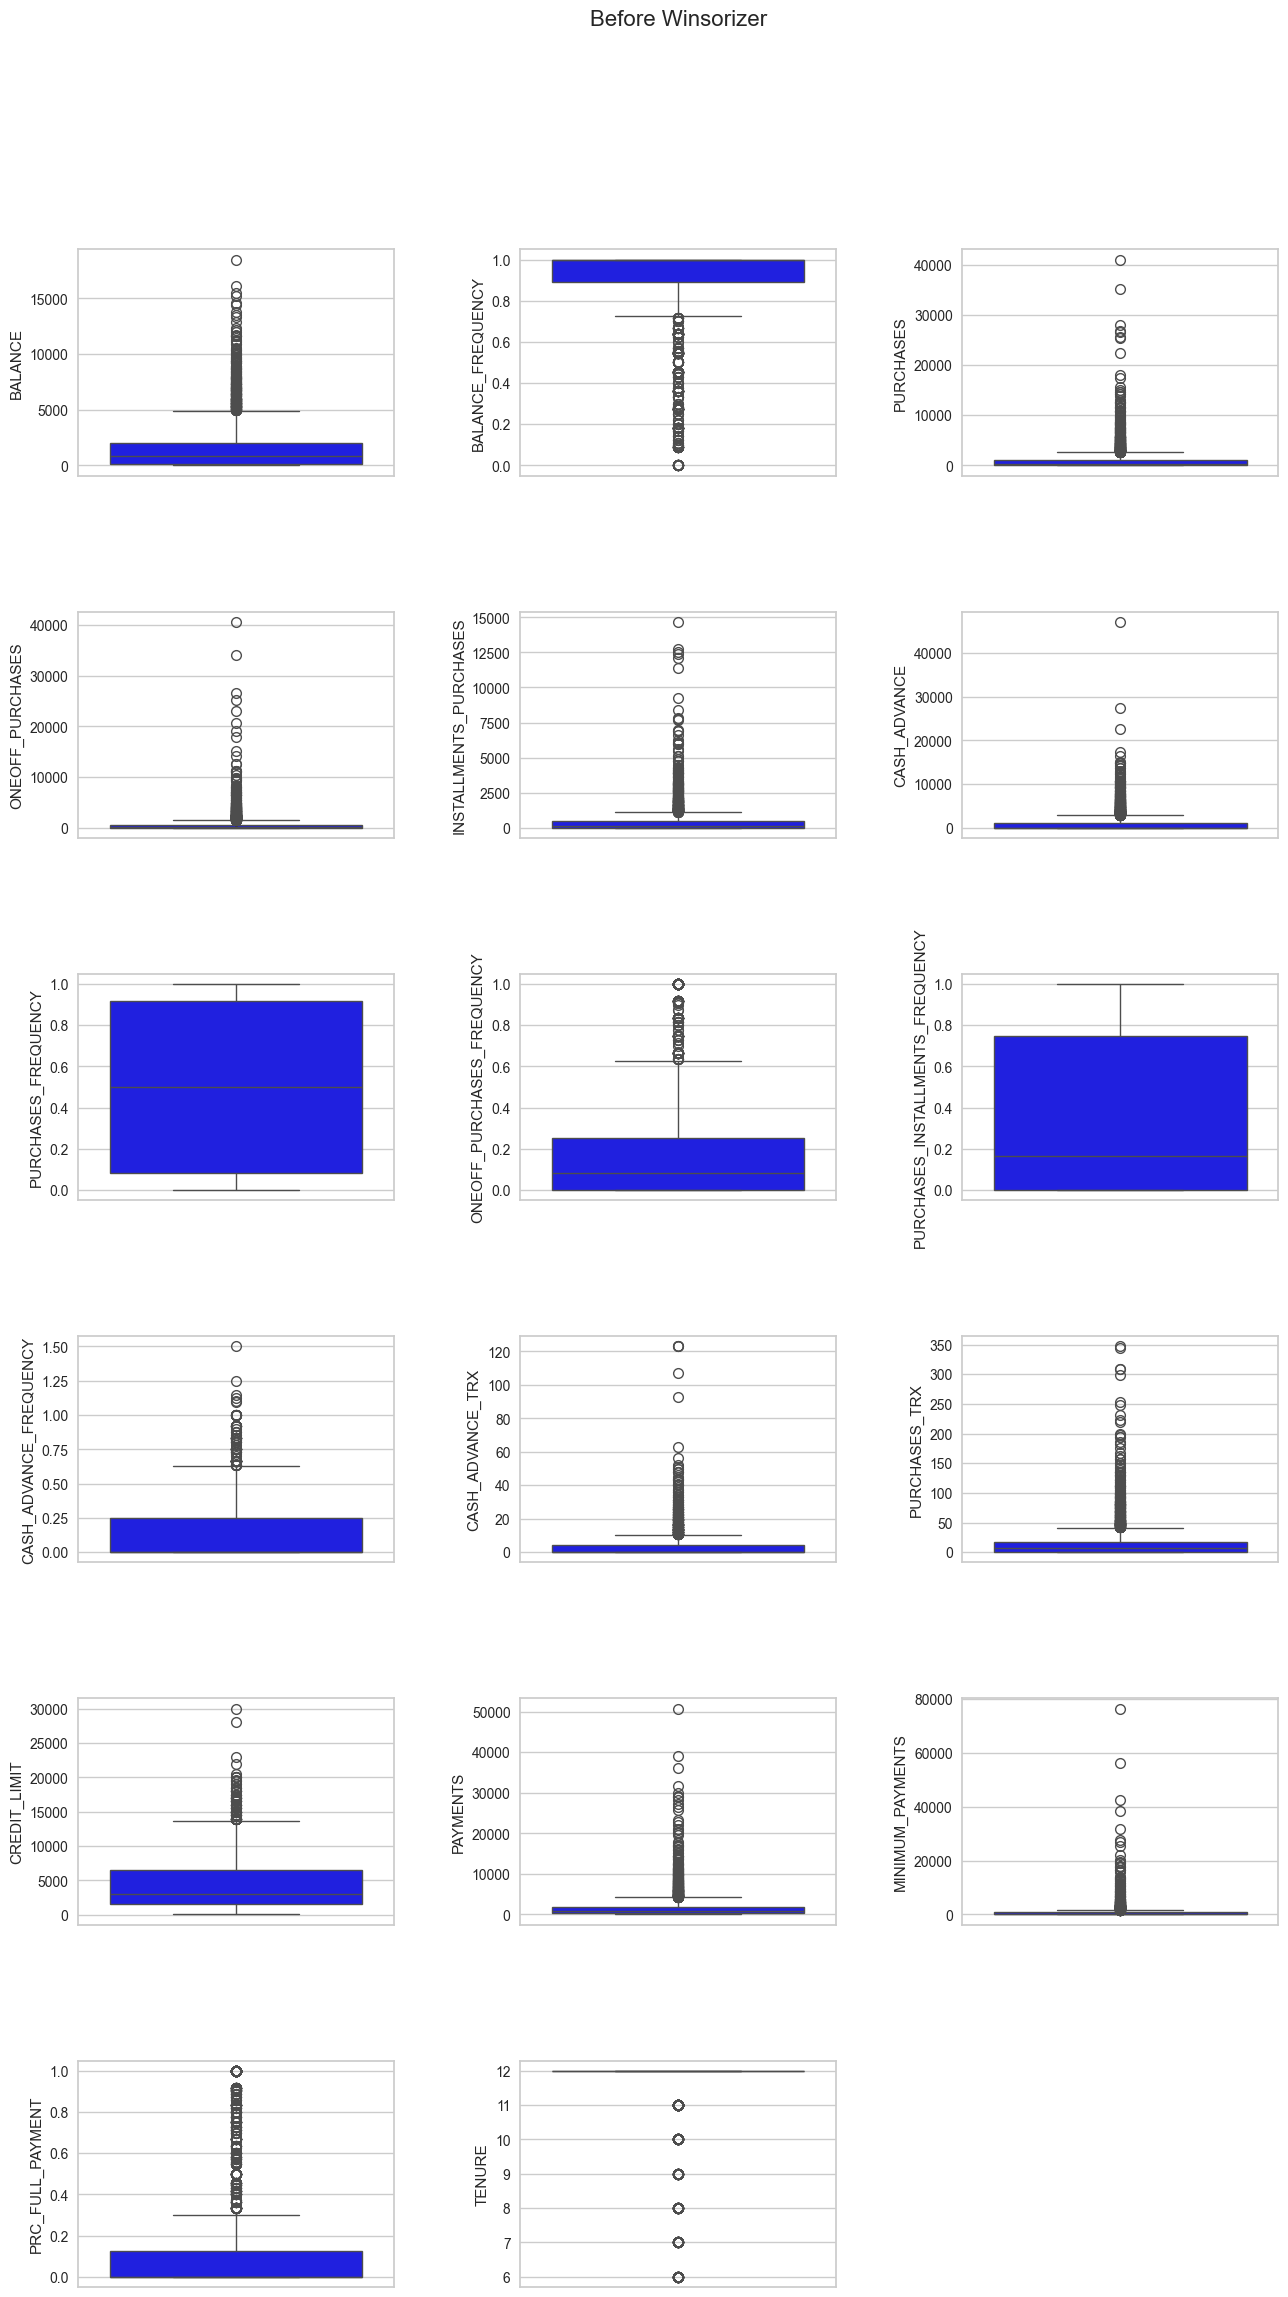

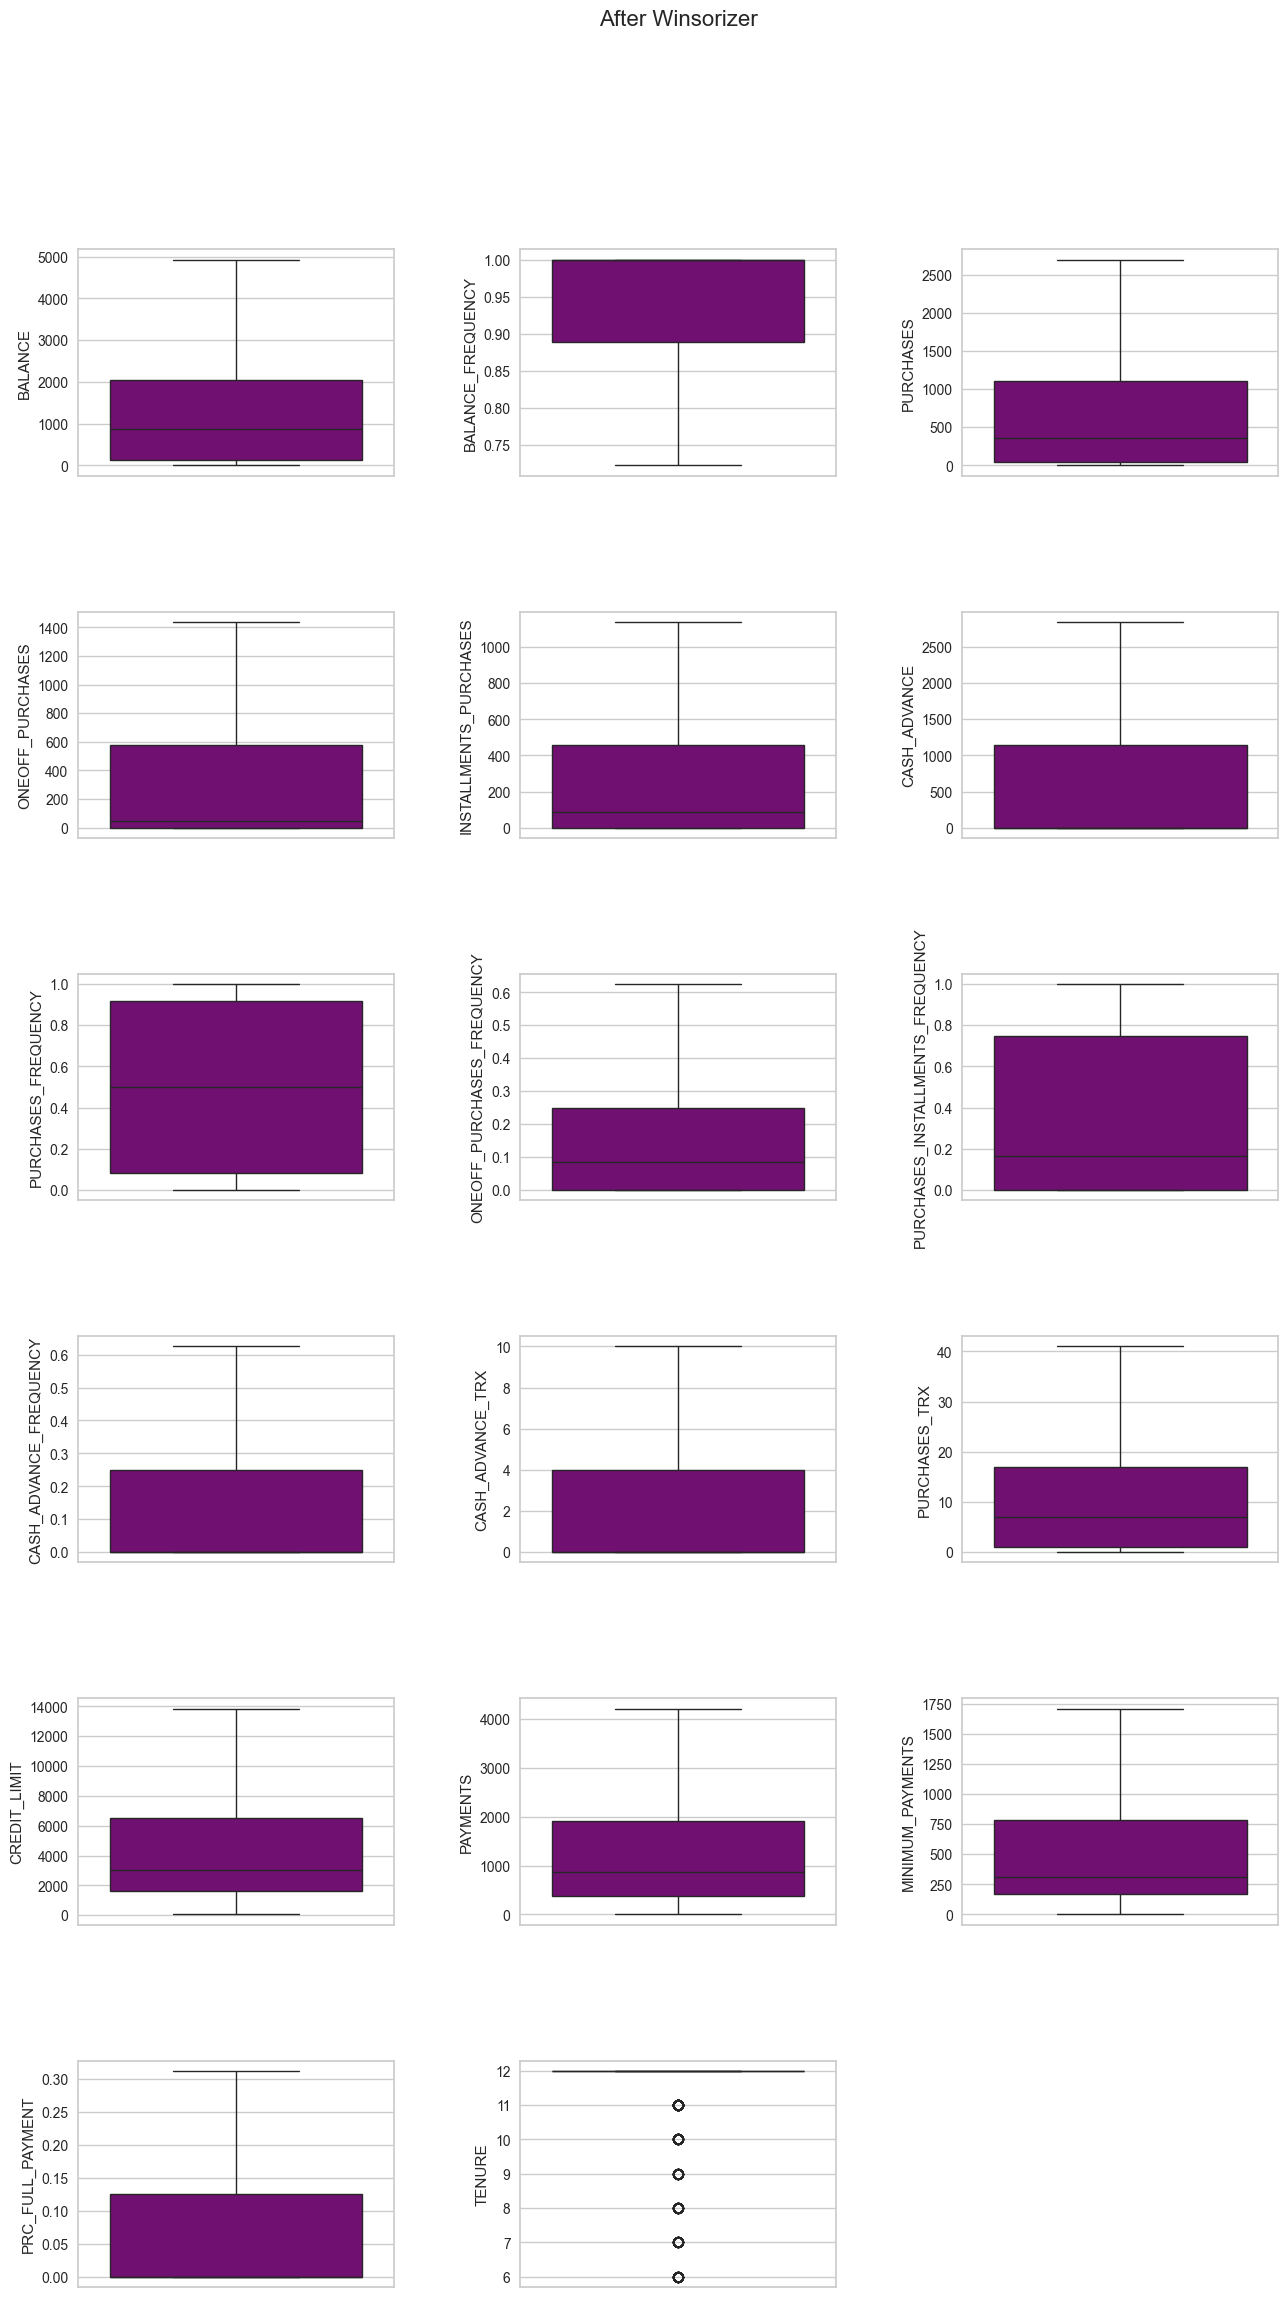

In [27]:
# Visualisasi sebelum Winsorizer
plt.figure(figsize=(15, 30))  # Menentukan ukuran gambar secara keseluruhan

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)  # Penyesuaian ruang antar subplot

for i, column in enumerate(dataset1.columns, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(dataset1[column], color='blue')
    plt.xticks(rotation=45)

plt.suptitle('Before Winsorizer', fontsize=16)
plt.show()

# Visualisasi setelah Winsorizer
plt.figure(figsize=(15, 30))  # Menentukan ukuran gambar secara keseluruhan

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)  # Penyesuaian ruang antar subplot

for i, column in enumerate(data_capped.columns, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(data_capped[column], color='purple')
    plt.xticks(rotation=45)

plt.suptitle('After Winsorizer', fontsize=16)
plt.show()

Kita sudah berhasil menghapus outlier dari setiap kolom ini akan memudahkan kita untuk melakukan proses selanjutnya

**Dimensionality Reduction**

Sebelum melakukan clustering akan dilakukan Dimensionality Reduction menggunakan PCA dengan alasan sebagai berikut:

1. Jelas bahwa kami memiliki **fitur yang sangat banyak**.

2. Banyak kasus yang menunjukkan bahwa ketika KMeans menggunakan hasil PCA, **hasil pengelompokan lebih baik** dibandingkan tanpa menggunakan PCA. Jika Anda tertarik untuk mendalami hubungan PCA dan KMeans, Anda dapat membaca [jurnal](https://ranger.uta.edu/~chqding/papers/KmeansPCA1.pdf).

**Scalling**

In [28]:
# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_capped)

In [29]:
# Menghitung dan menampilkan jumlah fitur dalam data yang telah discalling
num_features = data_scaled.shape[1]
print("Number of features:", num_features)

Number of features: 17


In [30]:
# Fit PCA
pca = PCA()
pca.fit(data_scaled)

PCA()

In [31]:
# Determine the number of components to retain 95% variance
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
print("Number of components to retain 95% variance:", num_features)

Number of components to retain 95% variance: 10


In [32]:
# Train PCA with the determined number of components
pca = PCA(n_components=num_features)
pca.fit(data_scaled)

PCA(n_components=10)

In [33]:
# Transform the data using PCA
data_scaled_pca = pca.transform(data_scaled)
data_scaled_pca = pd.DataFrame(data_scaled_pca)
print(data_scaled_pca.head())

          0         1         2         3         4         5         6  \
0 -2.084781 -2.586804 -0.727579  0.833577 -1.733298 -1.946402 -0.426855   
1 -1.748355 -2.033899 -1.201451  0.855948 -0.965178 -2.711814  0.286812   
2 -1.565634 -0.648813 -0.289589 -0.312278 -1.588692 -2.172153  0.220793   
3 -0.552320 -1.501637 -2.379312  1.418637 -1.423431 -1.837927 -1.015097   
4 -1.252025 -1.760520 -0.850263 -0.023583 -2.444545 -0.865110  0.892238   

          7         8         9  
0  0.502721  0.223110  0.090961  
1 -0.414039 -0.405190 -0.027730  
2  2.021129  0.904893  0.255521  
3  1.868167 -0.741243  0.381627  
4  1.075459 -0.941648 -0.355452  


In [34]:
# Save the PCA model
with open('pca.pkl', 'wb') as file:
    pickle.dump(pca, file)

Melakukan scaling dengan menggunakan StandardScaler sangat penting karena K-Means dan PCA menggunakan perhitungan jarak antar titik data. Berikut adalah alasan lebih lengkap:

1. **Konsistensi dalam Perhitungan Jarak**:
   - K-Means dan PCA mengandalkan perhitungan jarak (misalnya, jarak Euclidean) untuk mengelompokkan data dan mengidentifikasi pola. Jika fitur-fitur dalam dataset memiliki skala yang berbeda, fitur dengan skala yang lebih besar akan mendominasi perhitungan jarak, menyebabkan hasil yang tidak akurat.

2. **Pengaruh Fitur dengan Skala Lebih Besar**:
   - Fitur dengan nilai yang lebih besar akan memberikan kontribusi yang lebih besar terhadap jarak antar titik data. Misalnya, jika satu fitur memiliki nilai dalam ribuan sementara yang lain dalam puluhan, fitur pertama akan mendominasi analisis, meskipun mungkin tidak lebih penting dari fitur yang lain.

3. **Normalisasi Varians**:
   - StandardScaler mentransformasikan data sehingga setiap fitur memiliki rata-rata nol dan varians satu. Ini memastikan bahwa setiap fitur memberikan kontribusi yang sama terhadap analisis, mencegah fitur dengan skala yang lebih besar mendominasi.

4. **Kinerja Model yang Lebih Baik**:
   - Model seperti K-Means yang menggunakan centroid untuk mengelompokkan data sangat dipengaruhi oleh skala fitur. Scaling memastikan bahwa centroid yang dihasilkan mencerminkan distribusi data yang sebenarnya, yang pada akhirnya meningkatkan akurasi model.

5. **Stabilitas Numerik**:
   - Scaling dapat membantu dalam menghindari masalah stabilitas numerik yang mungkin muncul ketika mengolah data dengan skala yang sangat bervariasi. Ini membuat algoritma lebih stabil dan dapat diandalkan.

6. **Interpretasi yang Konsisten**:
   - Dengan fitur yang diskalakan, interpretasi dari hasil analisis menjadi lebih konsisten dan dapat dibandingkan. Misalnya, dalam PCA, komponen utama yang dihasilkan akan mencerminkan variasi yang sebenarnya dalam data, bukan hanya variasi yang disebabkan oleh skala fitur yang berbeda.

Dengan alasan-alasan tersebut, melakukan scaling menggunakan StandardScaler sebelum menerapkan K-Means dan PCA adalah langkah yang esensial untuk memastikan hasil yang akurat, interpretasi yang konsisten, dan kinerja model yang optimal.

In [35]:
# Menjadikan data array
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.31318918, 0.24288683, 0.09124748, 0.0789922 , 0.06266193,
       0.05040506, 0.03875916, 0.03155077, 0.02506998, 0.01891273])

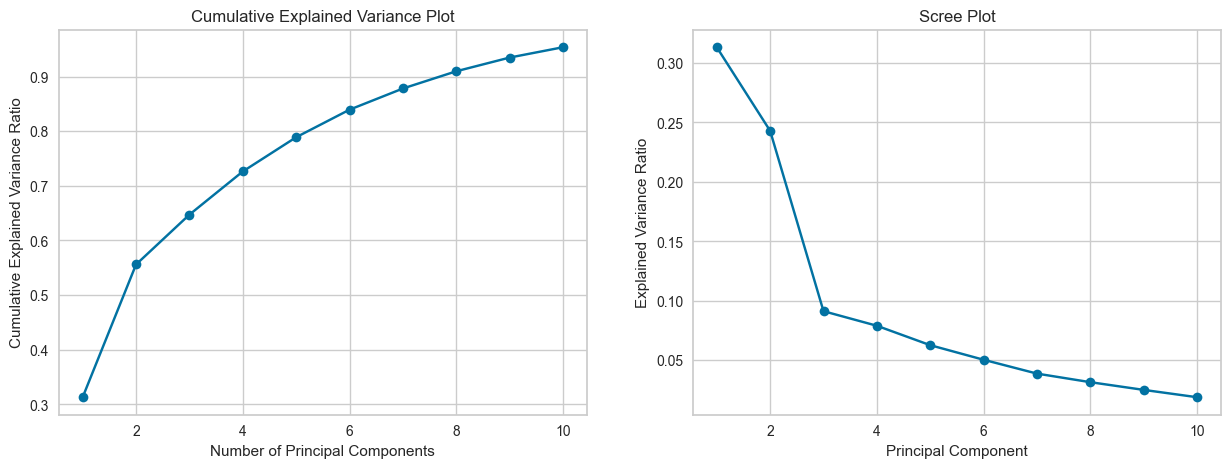

In [36]:
# Scree plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.title('Scree Plot')

cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.subplot(1, 2, 1)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

Tujuan utama PCA adalah untuk merepresentasikan ulang data dalam bentuk dimensi yang lebih rendah, sehingga lebih mudah dipahami dan dianalisis tanpa kehilangan informasi yang penting. PCA mencapai ini dengan mengidentifikasi komponen utama yang menjelaskan sebagian besar varians dalam data asli. Dengan melakukan ini, PCA memungkinkan kita untuk menyederhanakan kompleksitas data sambil mempertahankan informasi yang signifikan.

Dalam analisis ini, kita memutuskan untuk mempertahankan 95% dari total varians data. Melalui visualisasi hasil PCA, kita dapat melihat bahwa 10 komponen utama cukup untuk mencapai tujuan ini. Ini berarti bahwa dari seluruh fitur yang ada, hanya 10 komponen utama yang dipertahankan, dan mereka sudah cukup untuk menjelaskan 95% dari varians total dalam data. Dengan demikian, kita berhasil mengurangi dimensi data dari fitur asli menjadi hanya 10 komponen utama, yang membuat analisis lebih efisien dan interpretasi lebih mudah, sambil memastikan bahwa informasi penting tetap terjaga.

**Menampilkan elbow method untuk melihat cluster**

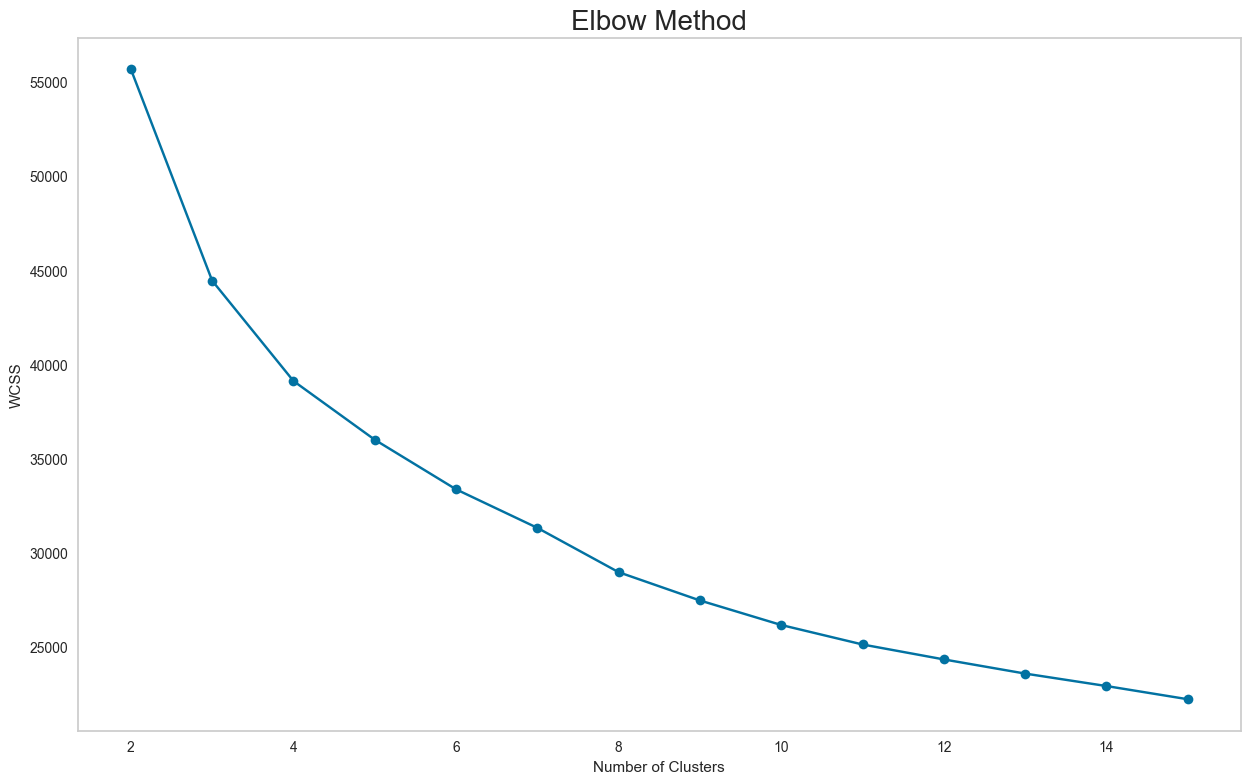

In [37]:
# Membuat elbow method
wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(data_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

berdasarkan grafik Elbow Method ini, jumlah cluster yang optimal untuk dataset Anda kemungkinan adalah sekitar 4 atau 5. Ini adalah titik di mana menambah lebih banyak cluster tidak lagi secara signifikan mengurangi Within-Cluster Sum of Squares, sehingga memberikan keseimbangan yang baik antara jumlah cluster dan kualitas clustering.

**Menampilkan hasil menggunakan silhoutte score dan plot**

For n_clusters = 2, the average silhouette_score is : 0.2309460477363902


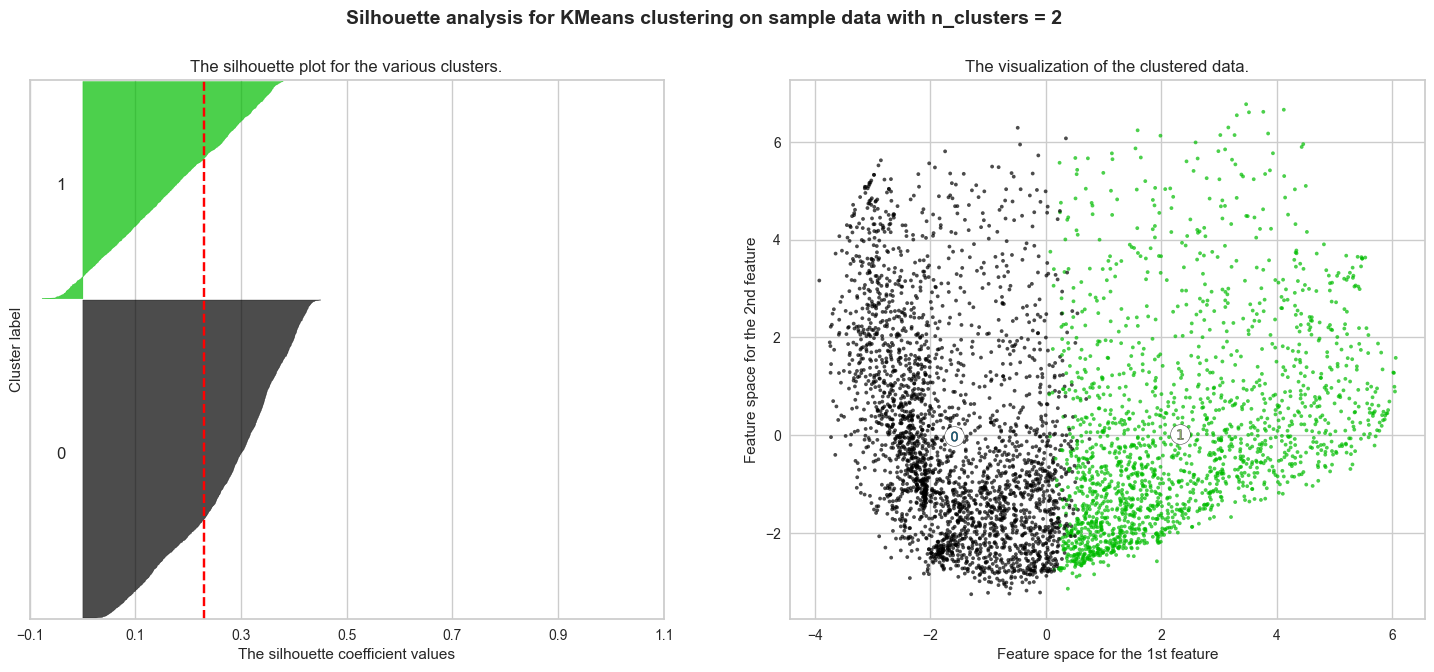

For n_clusters = 3, the average silhouette_score is : 0.24001772115392353


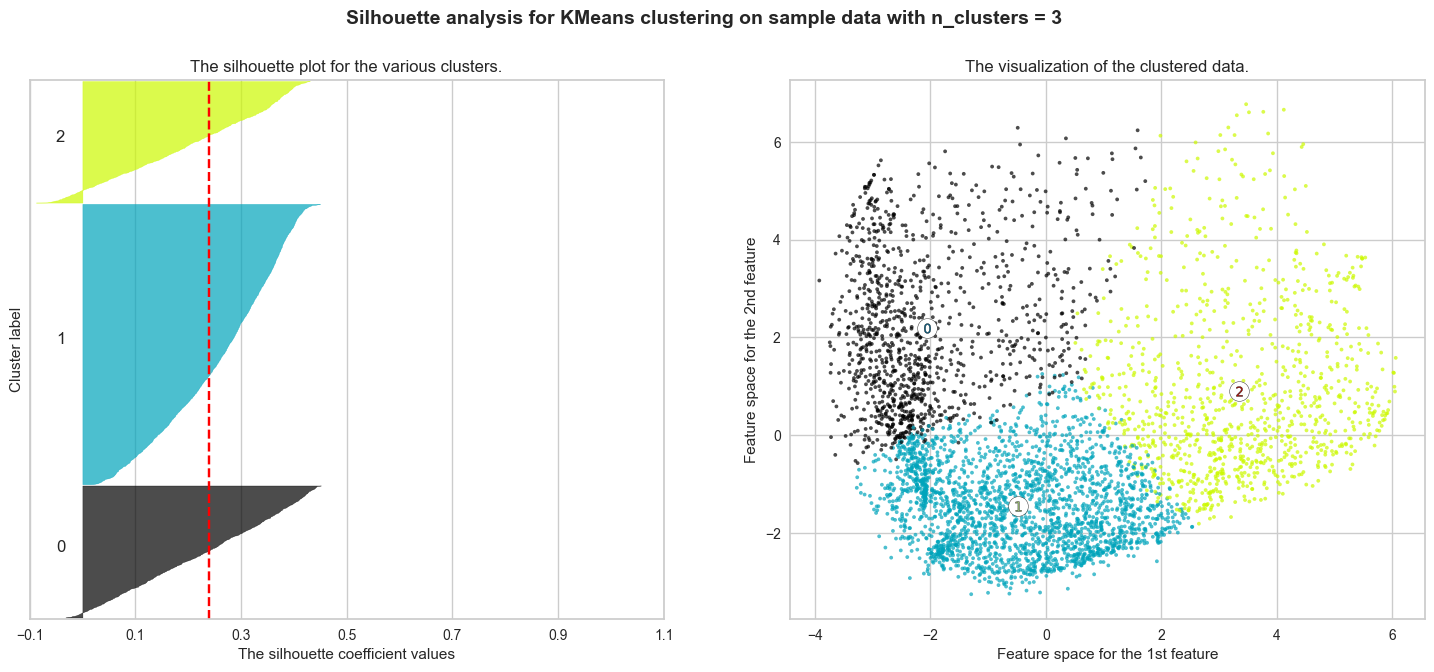

For n_clusters = 4, the average silhouette_score is : 0.21126398907762578


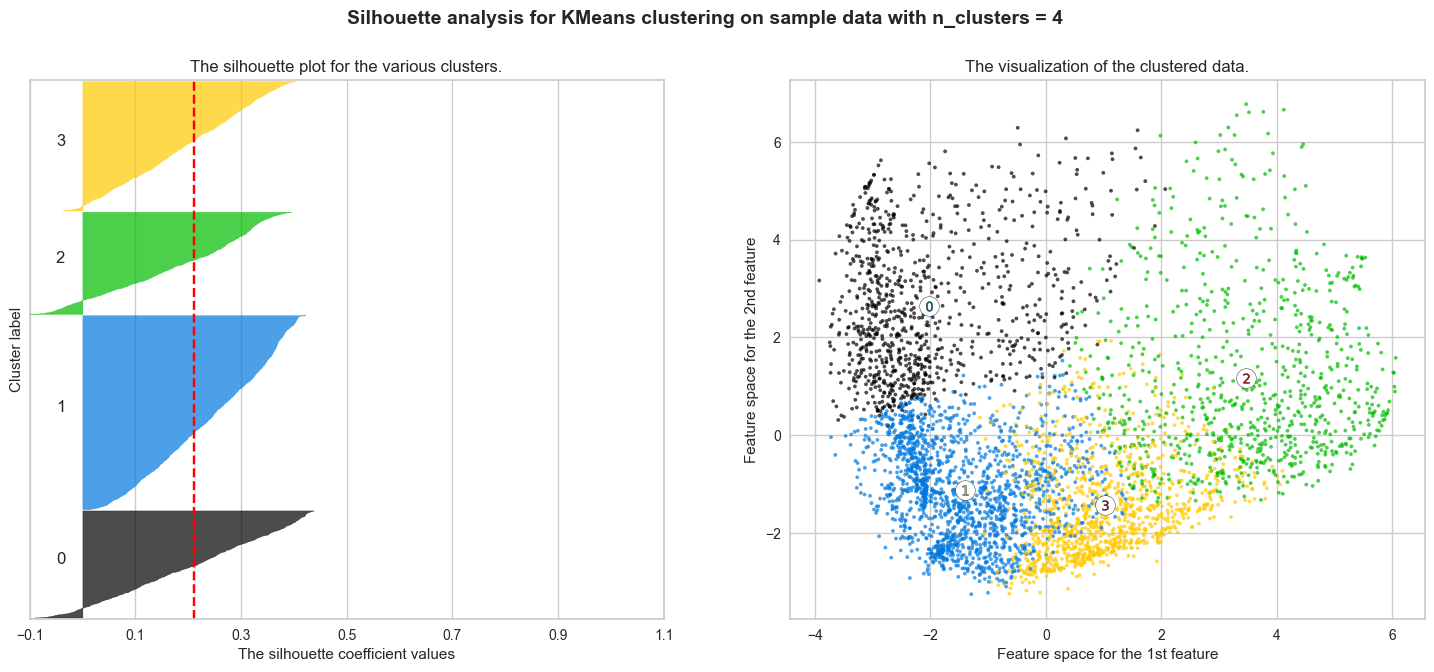

For n_clusters = 5, the average silhouette_score is : 0.20713006753581534


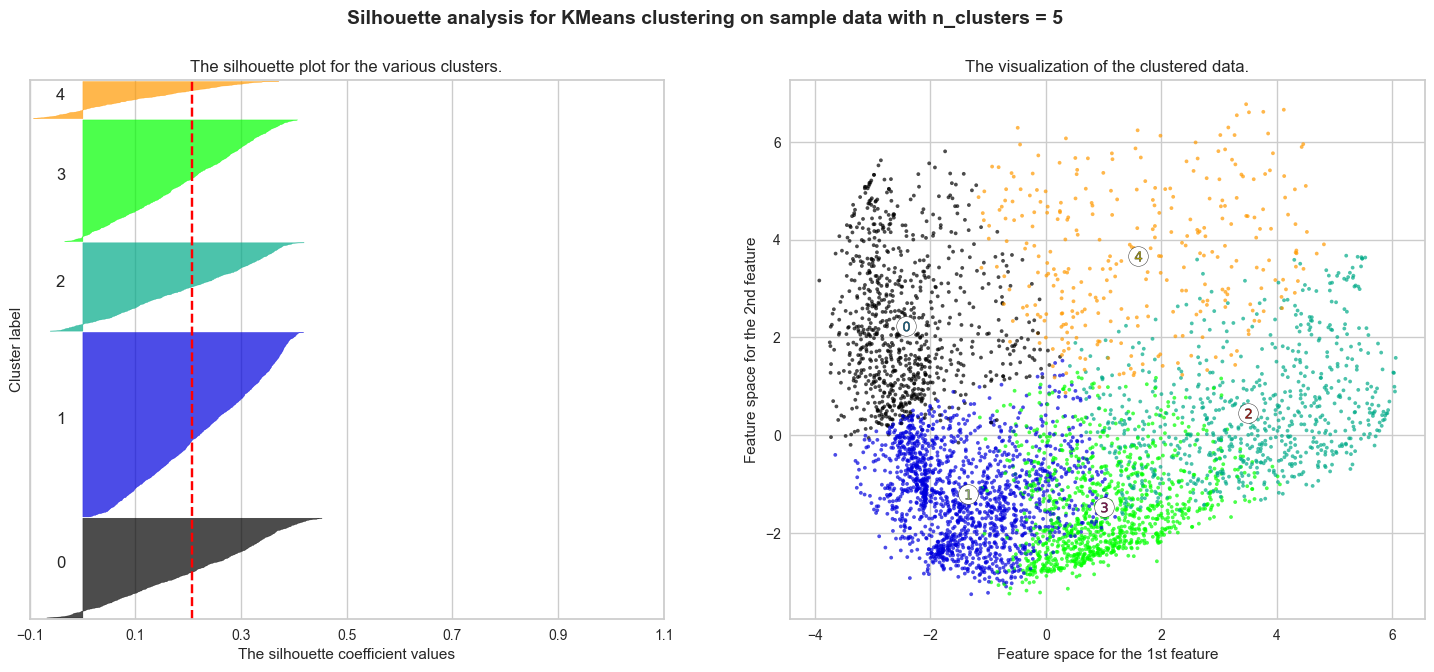

For n_clusters = 6, the average silhouette_score is : 0.2059009779712825


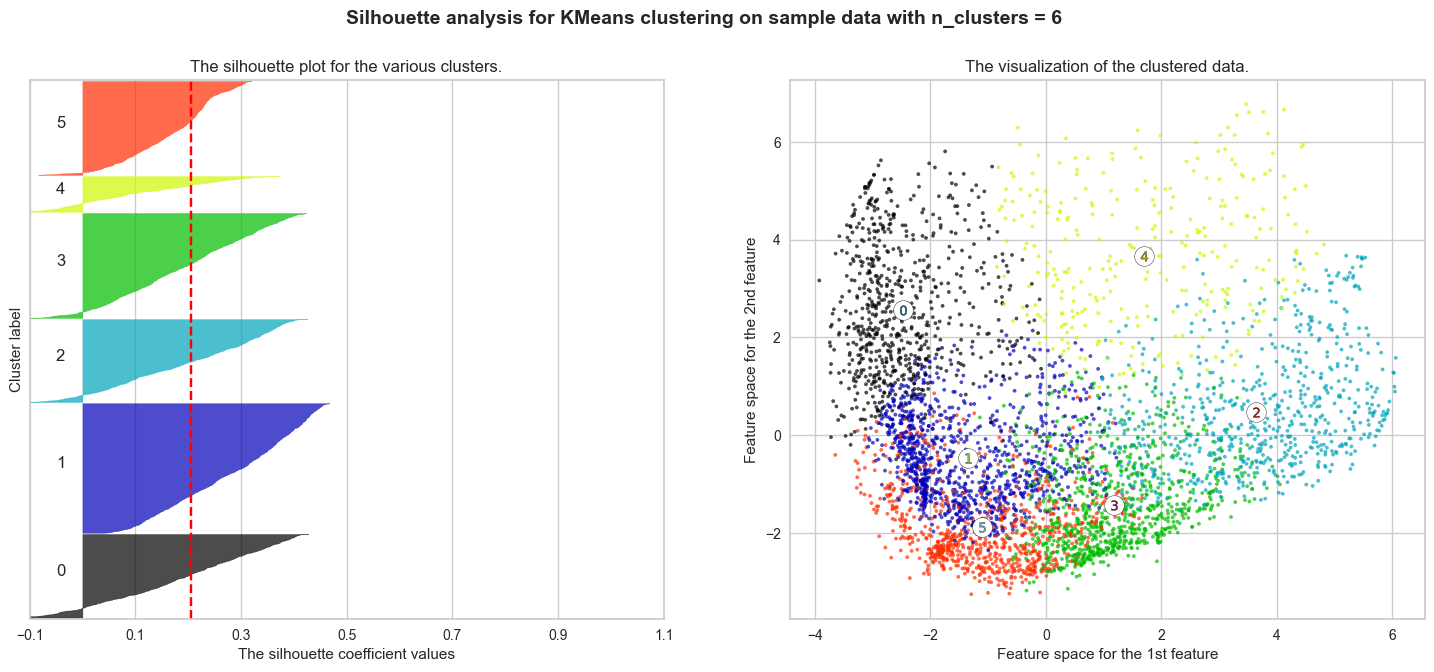

For n_clusters = 7, the average silhouette_score is : 0.197427828077837


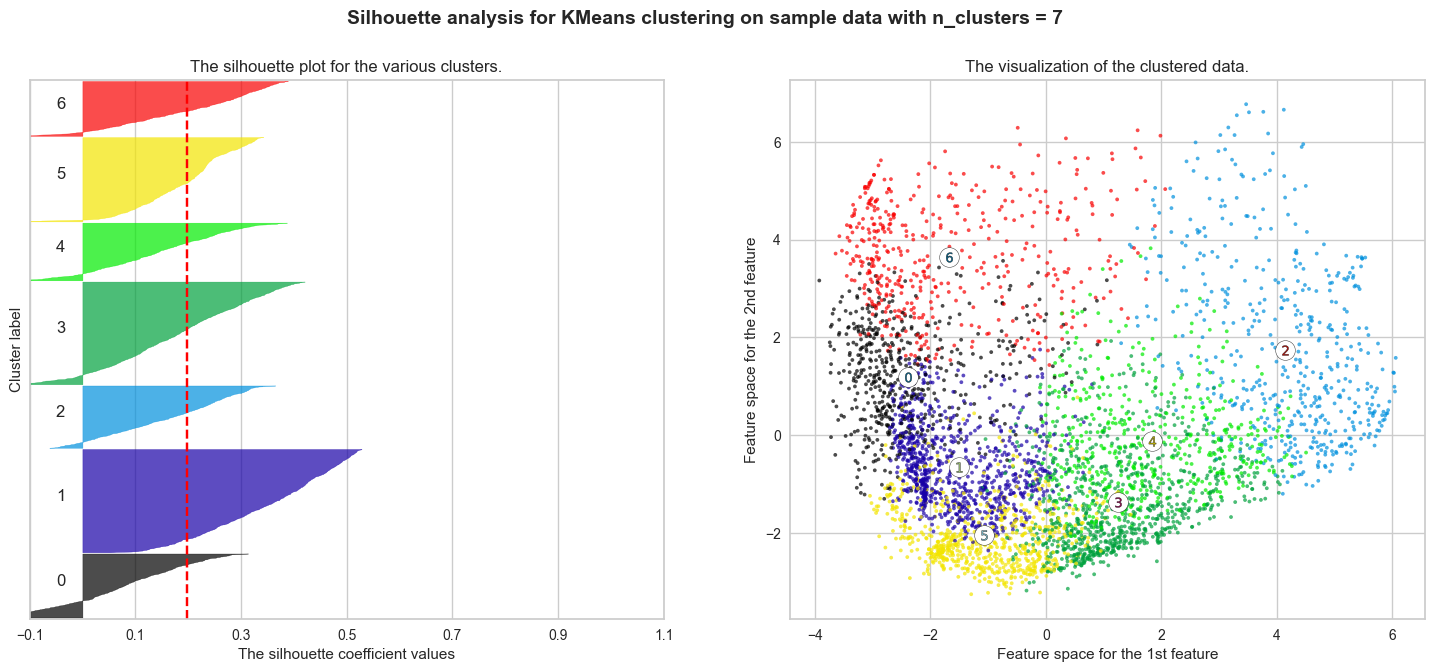

For n_clusters = 8, the average silhouette_score is : 0.20230184754619296


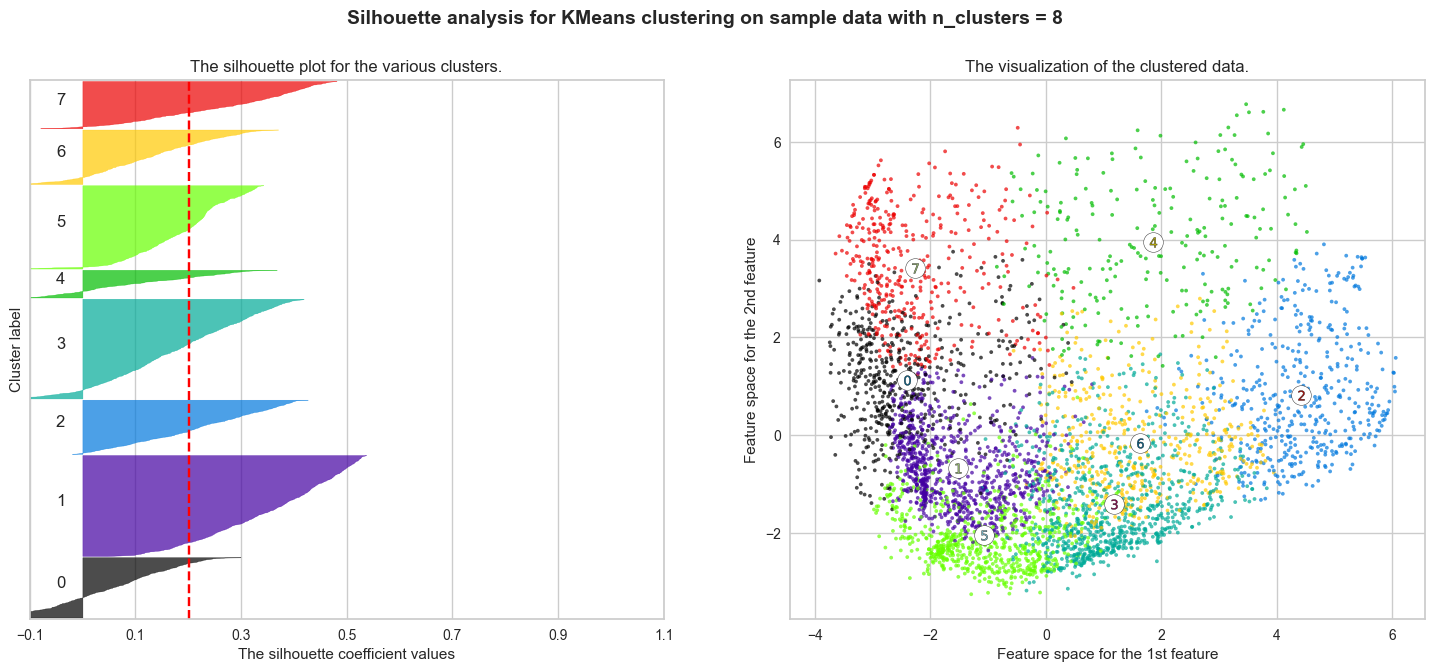

For n_clusters = 9, the average silhouette_score is : 0.21313331957521997


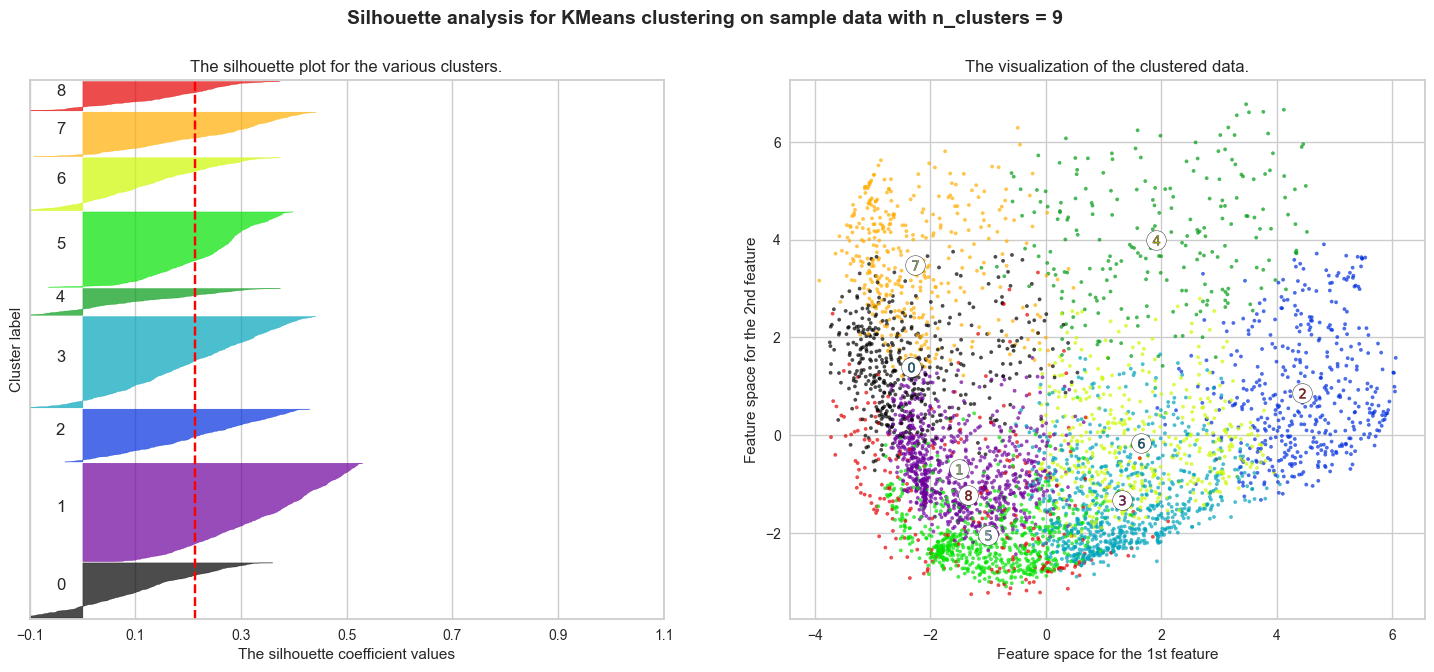

For n_clusters = 10, the average silhouette_score is : 0.21037307028371385


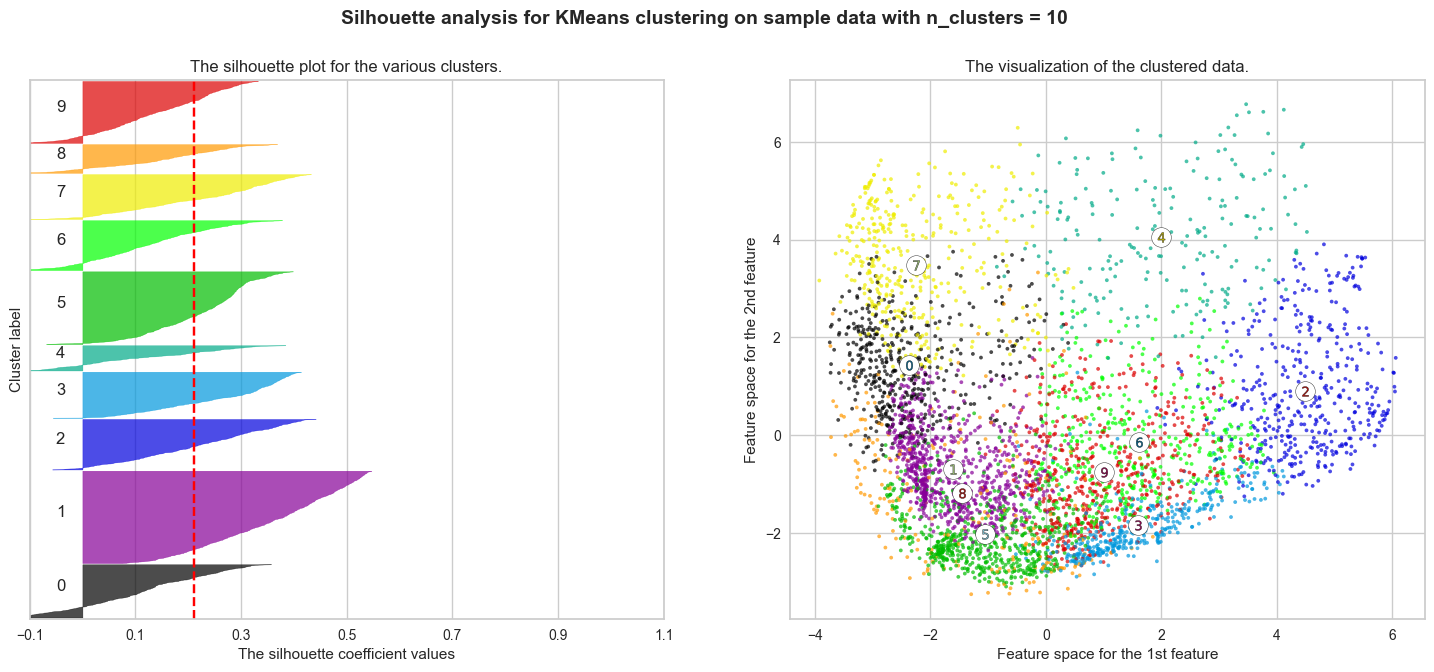

For n_clusters = 11, the average silhouette_score is : 0.21292491150377535


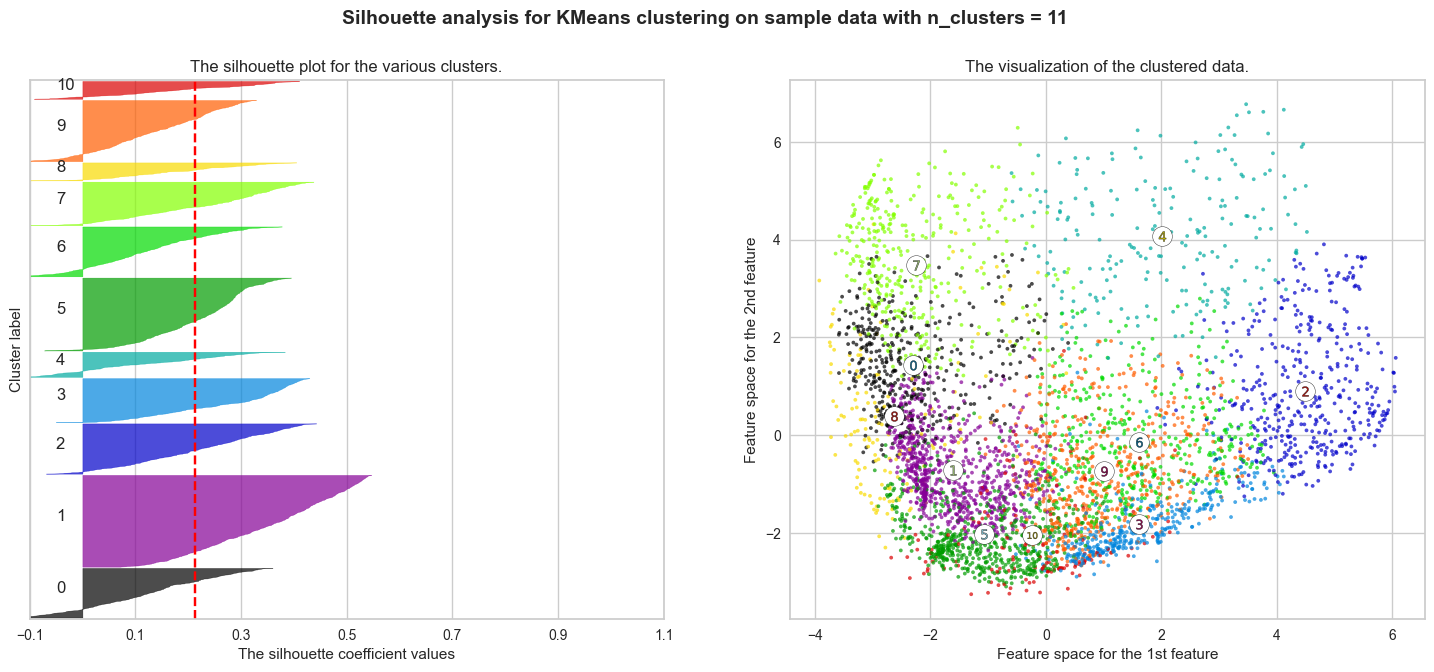

For n_clusters = 12, the average silhouette_score is : 0.21123944985716517


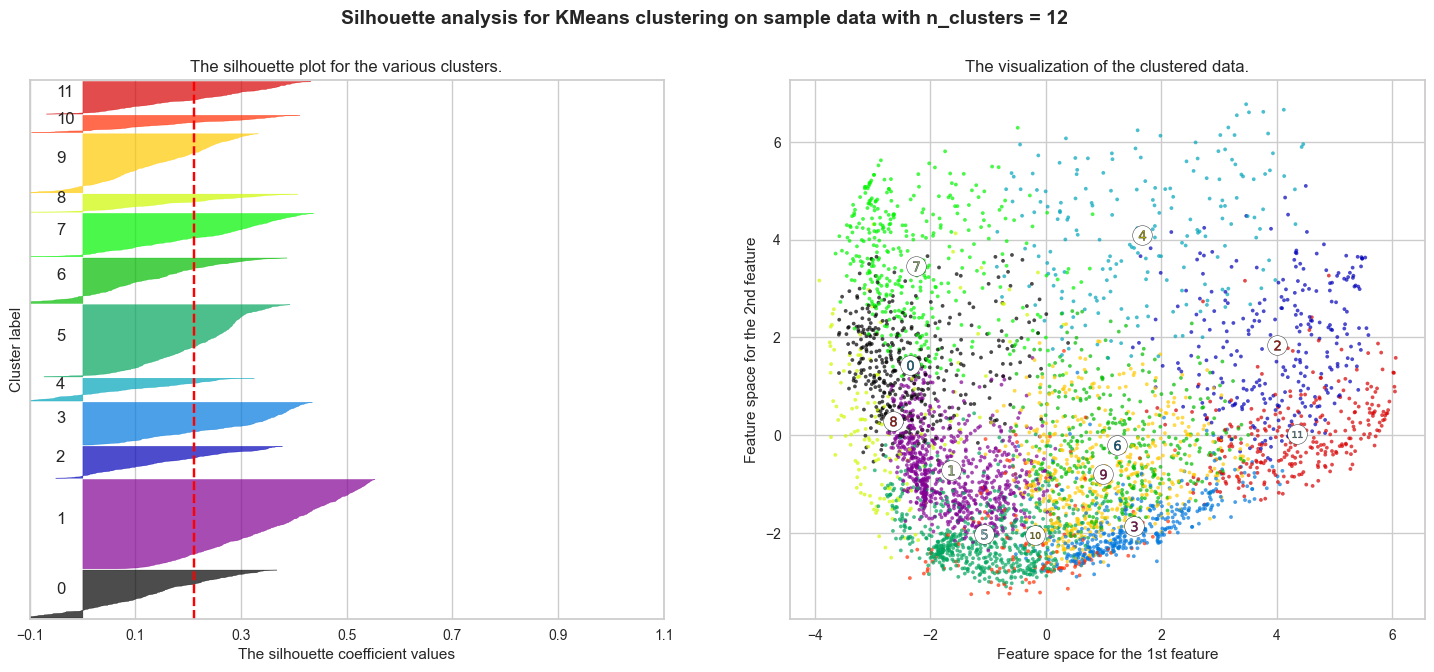

For n_clusters = 13, the average silhouette_score is : 0.21213379980107727


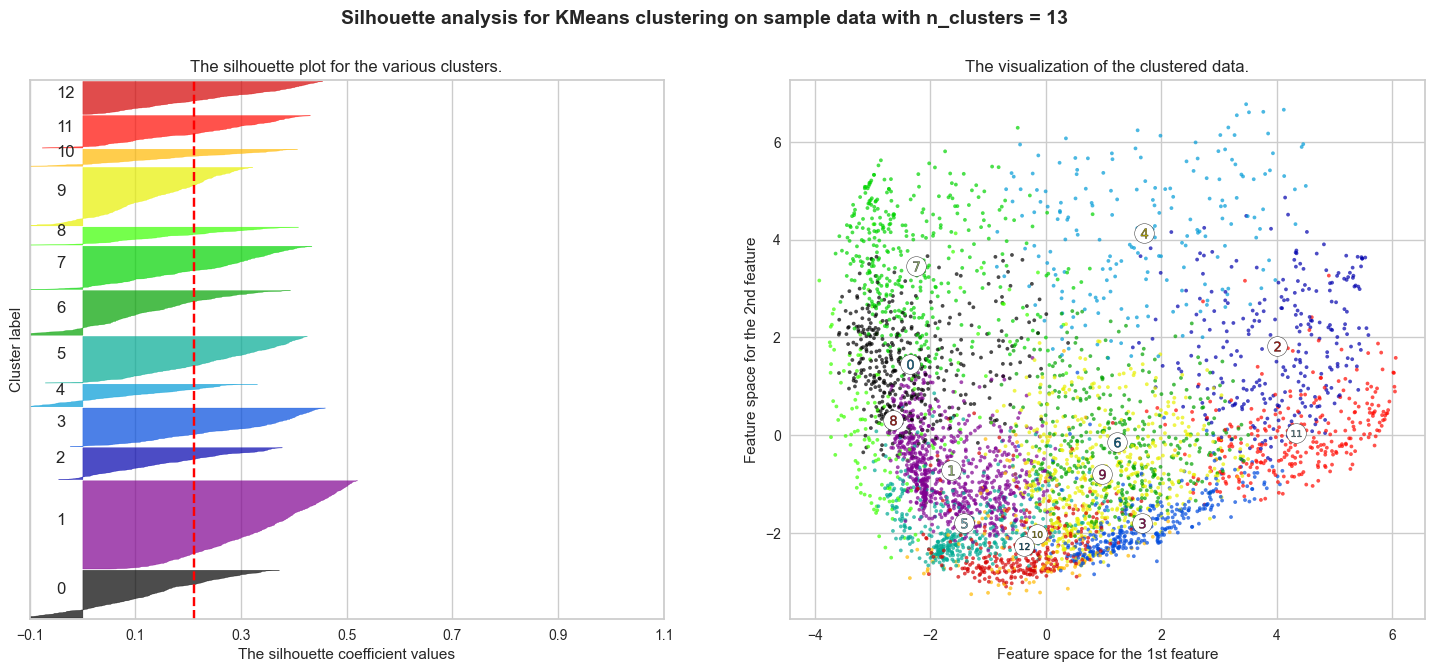

For n_clusters = 14, the average silhouette_score is : 0.21530135948607398


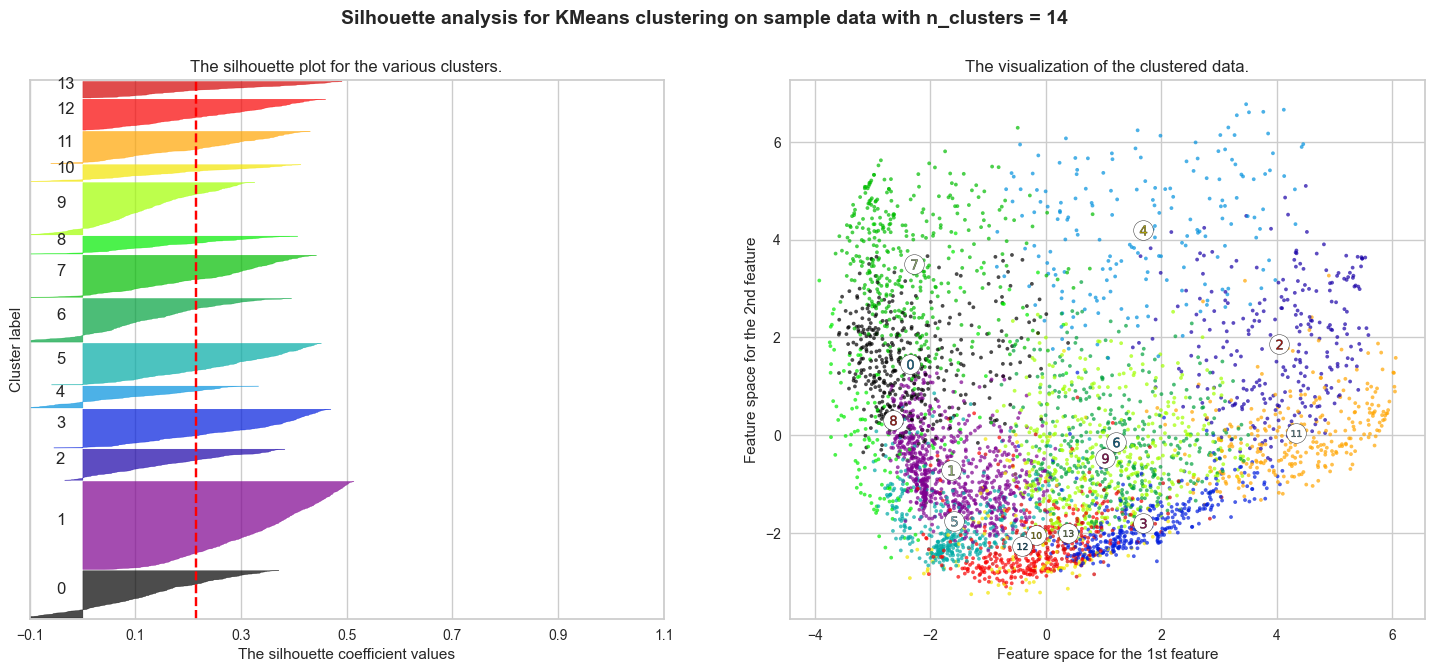

In [38]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed
        clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle((f"Silhouette analysis for KMeans clustering on sample data "
                      f"with n_clusters = {n_clusters}"), fontsize=14, fontweight='bold')

        plt.show()

# Pastikan data_scaled_pca adalah array NumPy
data_scaled_pca = np.array(data_scaled_pca)

# Menampilkan Silhouette Score dan Plot Silhouette Plot
plot_silhouette(range(2, max_cluster), data_scaled_pca, random_state)


**Melihat sebaran data setiap cluster**

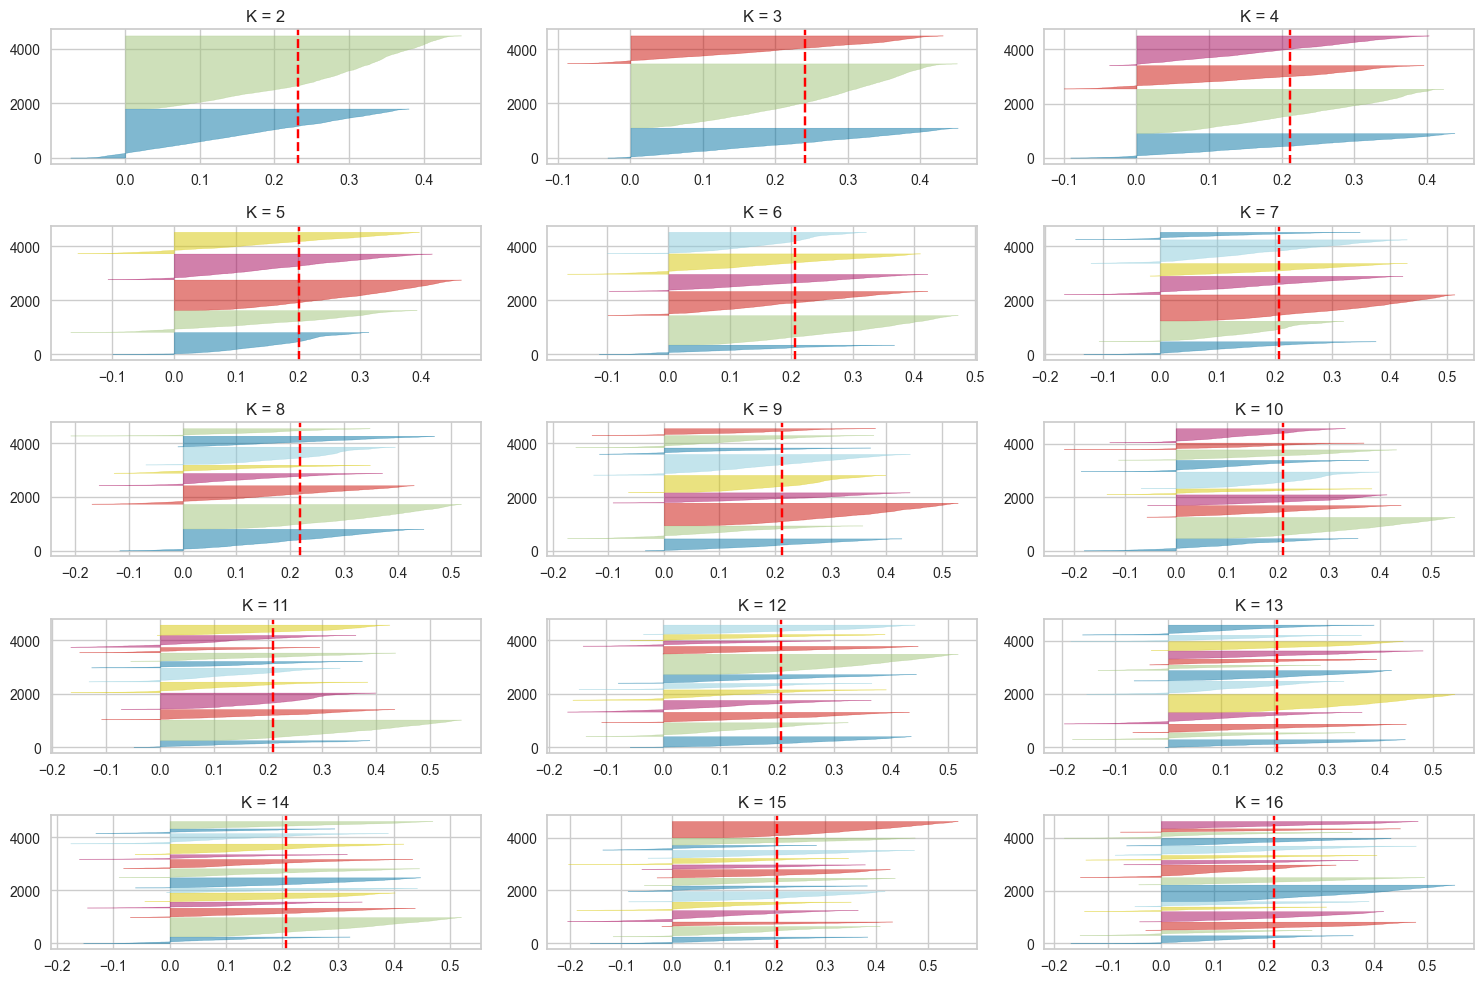

In [39]:
# Display the Silhouette Score and Plot Silhouette Plot

fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(data_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

Sebelumnya, melalui metode Elbow, kita bisa mengidentifikasi bahwa jumlah cluster yang optimal berada di antara 4 atau 5 cluster. Metode Elbow menunjukkan titik "elbow" sekitar angka tersebut, di mana penurunan WCSS (Within-Cluster Sum of Squares) mulai melambat secara signifikan, mengindikasikan bahwa penambahan cluster setelah titik ini memberikan manfaat yang semakin berkurang.

Selanjutnya, untuk memperkuat analisis, kita menggunakan metode Silhouette untuk mengevaluasi kualitas clustering. Metode Silhouette memberikan skor yang mengukur seberapa mirip data dalam satu cluster dibandingkan dengan data di cluster lain. Skor Silhouette berkisar antara -1 dan 1, dengan skor lebih tinggi menunjukkan clustering yang lebih baik.

Dalam hasil analisis menggunakan metode Silhouette, kami memfokuskan pada skor dari cluster dengan jumlah n = 3 dan n = 4, sesuai dengan hasil dari metode Elbow. Dari hasil yang diperoleh, terlihat bahwa skor Silhouette untuk n = 3 adalah yang paling mendekati angka optimal dengan nilai 0.24035701424486855. Skor ini menunjukkan bahwa pembagian data menjadi 5 cluster memberikan kualitas clustering yang lebih baik dibandingkan dengan 4 cluster, mengindikasikan bahwa data dalam cluster lebih homogen dan lebih berbeda dengan data di cluster lain.

Dengan demikian, berdasarkan kombinasi hasil dari metode Elbow dan analisis skor Silhouette, kita dapat menyimpulkan bahwa menggunakan 5 cluster adalah pilihan yang lebih baik untuk model clustering ini. Ini memastikan bahwa model tidak hanya akurat dalam hal minimisasi WCSS, tetapi juga memiliki pembagian cluster yang berkualitas tinggi, memaksimalkan homogenitas dalam cluster dan heterogenitas antar cluster.

---
**Kesimpulan**

Menghapus kolom **CUST_ID** dilakukan karena beberapa alasan penting. Pertama, kolom ini tidak informatif karena hanya berfungsi sebagai pengenal unik yang tidak relevan untuk memprediksi variabel target. Kedua, menyertakan pengenal unik seperti **CUST_ID** dapat menyebabkan overfitting. Sebelum memulai pemodelan adalah praktik umum untuk memastikan model yang lebih akurat dan dapat digeneralisasi.

Setelah menghapus nilai kosong pada kolom "MINIMUM_PAYMENT" dengan nilai median, yang dipilih karena distribusi data yang skew dan nilai rata-rata yang sangat tinggi, kita dapat melanjutkan proses modeling. Kolom-kolom yang memiliki skewness diidentifikasi untuk memudahkan pemodelan.

Metode handling outlier yang dipilih adalah capping karena metode ini memotong nilai-nilai outlier sehingga tidak melebihi batas tertentu tanpa menghilangkan data. Hampir semua kolom memiliki outlier yang akan dipotong menggunakan metode IQR dan Gaussian. Metode ini dipilih karena mudah diimplementasikan dan cepat dalam penghitungan, serta cocok untuk data yang cenderung mengikuti distribusi normal, memudahkan eksplorasi data awal dan pembersihan data. Dengan berhasil menghapus outlier, proses selanjutnya dapat dilakukan dengan lebih efisien.

Setelah melakukan proses ini kita akan melanjutkan proses modelling informasi diatas sudah cukup memberikan gambaran isi data yang terbaru. Sebelum melakukan clustering akan dilakukan Dimensionality Reduction menggunakan PCA dengan alasan sebagai berikut:

1. **Fitur yang Sangat Banyak**:
   - Jelas bahwa kami memiliki banyak fitur yang dapat membuat analisis dan modeling menjadi lebih kompleks.

2. **Peningkatan Kualitas Pengelompokan dengan PCA**:
   - Banyak kasus menunjukkan bahwa ketika K-Means menggunakan hasil PCA, hasil pengelompokan lebih baik dibandingkan tanpa menggunakan PCA. PCA membantu dalam mereduksi dimensi data, yang pada gilirannya meningkatkan performa K-Means dalam mengidentifikasi cluster yang bermakna.

Melakukan scaling dengan menggunakan StandardScaler sangat penting karena K-Means dan PCA menggunakan perhitungan jarak antar titik data. Berikut adalah alasan lebih lengkap:

1. **Banyaknya Fitur:**
   - Banyak fitur dalam data dapat meningkatkan kompleksitas analisis dan modeling.

2. **Peningkatan Pengelompokan dengan PCA:**
   - Penggunaan PCA untuk mereduksi dimensi data sebelum K-Means dapat meningkatkan kualitas pengelompokan.

**Pentingnya Scaling dengan StandardScaler:**

1. **Konsistensi Perhitungan Jarak:**
   - Menjamin akurasi perhitungan jarak dengan menyamakan skala fitur.

2. **Pengaruh Skala Besar:**
   - Menghindari dominasi fitur dengan skala besar dalam analisis.

3. **Normalisasi Varians:**
   - Setiap fitur memiliki kontribusi yang sama setelah transformasi.

4. **Kinerja Model yang Lebih Baik:**
   - Centroid yang akurat meningkatkan akurasi model.

5. **Stabilitas Numerik:**
   - Menghindari masalah stabilitas yang timbul dari variasi skala yang besar.

6. **Interpretasi Konsisten:**
   - Hasil analisis lebih konsisten dan dapat dibandingkan.

Scaling dengan StandardScaler sebelum PCA dan K-Means sangat penting untuk akurasi, interpretasi konsisten, dan kinerja model optimal.

Dengan alasan-alasan tersebut, melakukan scaling menggunakan StandardScaler sebelum menerapkan K-Means dan PCA adalah langkah yang esensial untuk memastikan hasil yang akurat, interpretasi yang konsisten, dan kinerja model yang optimal. 

Tujuan utama PCA adalah untuk merepresentasikan ulang data dalam bentuk dimensi yang lebih rendah, sehingga lebih mudah dipahami dan dianalisis tanpa kehilangan informasi yang penting. PCA mencapai ini dengan mengidentifikasi komponen utama yang menjelaskan sebagian besar varians dalam data asli. Dengan melakukan ini, PCA memungkinkan kita untuk menyederhanakan kompleksitas data sambil mempertahankan informasi yang signifikan.

Dalam analisis ini, kita memutuskan untuk mempertahankan 95% dari total varians data. Melalui visualisasi hasil PCA, kita dapat melihat bahwa 10 komponen utama cukup untuk mencapai tujuan ini. Ini berarti bahwa dari seluruh fitur yang ada, hanya 10 komponen utama yang dipertahankan, dan mereka sudah cukup untuk menjelaskan 95% dari varians total dalam data. Dengan demikian, kita berhasil mengurangi dimensi data dari fitur asli menjadi hanya 10 komponen utama, yang membuat analisis lebih efisien dan interpretasi lebih mudah, sambil memastikan bahwa informasi penting tetap terjaga.

Berdasarkan grafik Elbow Method ini, jumlah cluster yang optimal untuk dataset Anda kemungkinan adalah sekitar 4 atau 5. Ini adalah titik di mana menambah lebih banyak cluster tidak lagi secara signifikan mengurangi Within-Cluster Sum of Squares, sehingga memberikan keseimbangan yang baik antara jumlah cluster dan kualitas clustering. Sebelumnya, melalui metode Elbow, kita bisa mengidentifikasi bahwa jumlah cluster yang optimal berada di antara 4 atau 5 cluster. Metode Elbow menunjukkan titik "elbow" sekitar angka tersebut, di mana penurunan WCSS (Within-Cluster Sum of Squares) mulai melambat secara signifikan, mengindikasikan bahwa penambahan cluster setelah titik ini memberikan manfaat yang semakin berkurang.

Selanjutnya, untuk memperkuat analisis, kita menggunakan metode Silhouette untuk mengevaluasi kualitas clustering. Metode Silhouette memberikan skor yang mengukur seberapa mirip data dalam satu cluster dibandingkan dengan data di cluster lain. Skor Silhouette berkisar antara -1 dan 1, dengan skor lebih tinggi menunjukkan clustering yang lebih baik.

Dalam hasil analisis menggunakan metode Silhouette, kami memfokuskan pada skor dari cluster dengan jumlah n = 3 dan n = 4, sesuai dengan hasil dari metode Elbow. Dari hasil yang diperoleh, terlihat bahwa skor Silhouette untuk n = 3 adalah yang paling mendekati angka optimal dengan nilai 0.24035701424486855. Skor ini menunjukkan bahwa pembagian data menjadi 5 cluster memberikan kualitas clustering yang lebih baik dibandingkan dengan 4 cluster, mengindikasikan bahwa data dalam cluster lebih homogen dan lebih berbeda dengan data di cluster lain.

Dengan demikian, berdasarkan kombinasi hasil dari metode Elbow dan analisis skor Silhouette, kita dapat menyimpulkan bahwa menggunakan 5 cluster adalah pilihan yang lebih baik untuk model clustering ini. Ini memastikan bahwa model tidak hanya akurat dalam hal minimisasi WCSS, tetapi juga memiliki pembagian cluster yang berkualitas tinggi, memaksimalkan homogenitas dalam cluster dan heterogenitas antar cluster.

# **vii. Model Definition** 

Dalam analisis ini, akan diterapkan pemodelan dengan mendefinisikan model K-Means clustering yang akan mencoba membagi data menjadi 5 cluster dengan inisialisasi centroid yang lebih baik menggunakan k-means++, menjalankan maksimal 300 iterasi per run, dan melakukan 10 run dengan inisialisasi berbeda untuk mendapatkan hasil terbaik.

**1. KMeans**

* n_clusters=5: Menentukan jumlah klaster yang ingin dibentuk, dalam hal ini sebanyak 5 cluster.
* init='k-means++': Menentukan metode inisialisasi centroid. k-means++ adalah metode yang canggih untuk memilih centroid awal yang dapat mempercepat konvergensi algoritma.
* max_iter=300: Menentukan jumlah iterasi maksimum yang diperbolehkan untuk algoritma K-Means dalam satu run. Artinya, algoritma akan berhenti setelah 300 iterasi meskipun belum mencapai konvergensi.
* n_init=10: Menentukan jumlah run algoritma K-Means yang akan dilakukan dengan inisialisasi centroid yang berbeda-beda. Hasil terbaik dari 10 run tersebut akan dipilih sebagai hasil akhir.
* random_state=random_state: Menetapkan seed untuk generator angka acak, yang berguna untuk memastikan hasil yang reproduktif. Variabel random_state sebelumnya harus didefinisikan.

In [40]:
# Mendefinisikan model KMeans clustering
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

# **viii. Model Training** 

In [41]:
# Menjalankan algoritma KMeans clustering
pred = km.fit_predict(data_scaled_pca)
# Menampilkan hasil clustering dalam bentuk array atau list
pred

array([0, 0, 2, ..., 4, 4, 4])

In [42]:
# Memasukkan hasil clustering ke data raw
dataset['CLUSTER'] = pred
dataset

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3091     3.833185              0.125      45.00             45.00   
1        5069     0.000000              0.000     176.03            176.03   
2        6075   757.964752              0.875     157.40            157.40   
3        6291   264.566591              0.375    1150.00           1150.00   
4        7755   440.613643              1.000     600.00            600.00   
...       ...          ...                ...        ...               ...   
4470     2345  9629.808851              1.000       0.00              0.00   
4471     6785  1040.030221              1.000       0.00              0.00   
4472     7347  1322.818587              1.000       0.00              0.00   
4473     8447  1060.391273              1.000       0.00              0.00   
4474     1995  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
0        0.000000               NaN               0.0       8        0  
1        0.000000               NaN               0.0       8        0  
2     1494.480376       2638.598410               0.0       8        2  
3     3029.380326         85.428885               0.0       8        0  
4      215.316424        137.846006               0.0       8        2  
...           ...               ... 

**Kesimpulan**

* Algoritma KMeans diterapkan pada data yang telah di-skala dan diubah dengan PCA untuk mengelompokkan data ke dalam beberapa cluster.
* Hasil clustering ini kemudian dimasukkan ke dalam dataset asli sebagai kolom baru bernama 'CLUSTER'.
* Dengan demikian, setiap baris dalam dataset sekarang memiliki label cluster yang menunjukkan keanggotaan klusternya.

# **ix. Model Evaluation** 

Untuk mengevaluasi model kMeans kita akan menampilkan beberapa chart & plot yang sudah di lakukan clustering
- **Elbow Method** dapat digunakan untuk menentukan jumlah cluster yang optimal.
- **Silhouette Score** dan **Silhoutte Plot** memberikan evaluasi seberapa baik data dikelompokkan ke dalam cluster yang berbeda.

Dengan menggunakan berbagai metrik evaluasi ini, Anda dapat memperoleh gambaran yang lebih komprehensif tentang kualitas hasil clustering KMeans pada dataset kita.

**Menampilkan persebaran data cluster yang kita pilih**

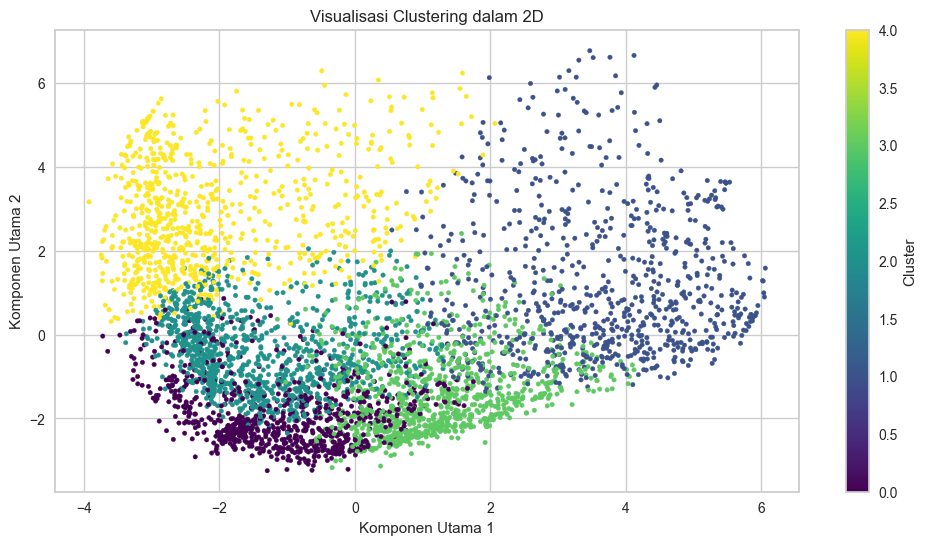

In [43]:
# Mengurangi dimensi data menjadi 2D menggunakan PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled_pca)

# Membuat scatter plot untuk visualisasi hasil clustering
plt.figure(figsize=(12, 6))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=dataset['CLUSTER'], cmap='viridis', s=10)
plt.colorbar(scatter, label='Cluster')
plt.title('Visualisasi Clustering dalam 2D')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

- Clustering menggunakan KMeans telah membagi data ke dalam 5 cluster yang berbeda. Setiap cluster memiliki karakteristik yang cukup jelas dengan beberapa overlap.
- Gambar ini menunjukkan bahwa algoritma KMeans telah berhasil memisahkan data point berdasarkan karakteristik yang berbeda, namun ada beberapa daerah di mana cluster sedikit overlap.

In [44]:
# Melihat kembali data raw
dataset

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3091     3.833185              0.125      45.00             45.00   
1        5069     0.000000              0.000     176.03            176.03   
2        6075   757.964752              0.875     157.40            157.40   
3        6291   264.566591              0.375    1150.00           1150.00   
4        7755   440.613643              1.000     600.00            600.00   
...       ...          ...                ...        ...               ...   
4470     2345  9629.808851              1.000       0.00              0.00   
4471     6785  1040.030221              1.000       0.00              0.00   
4472     7347  1322.818587              1.000       0.00              0.00   
4473     8447  1060.391273              1.000       0.00              0.00   
4474     1995  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
0        0.000000               NaN               0.0       8        0  
1        0.000000               NaN               0.0       8        0  
2     1494.480376       2638.598410               0.0       8        2  
3     3029.380326         85.428885               0.0       8        0  
4      215.316424        137.846006               0.0       8        2  
...           ...               ... 

In [45]:
# Menambahkan kolom 'Variable' ke dalam dataset dengan nilai default 'Variable'.
dataset['Variable'] = 'Variable'

**Melihat persebaran seluruh kolom setelah melakukan model training**

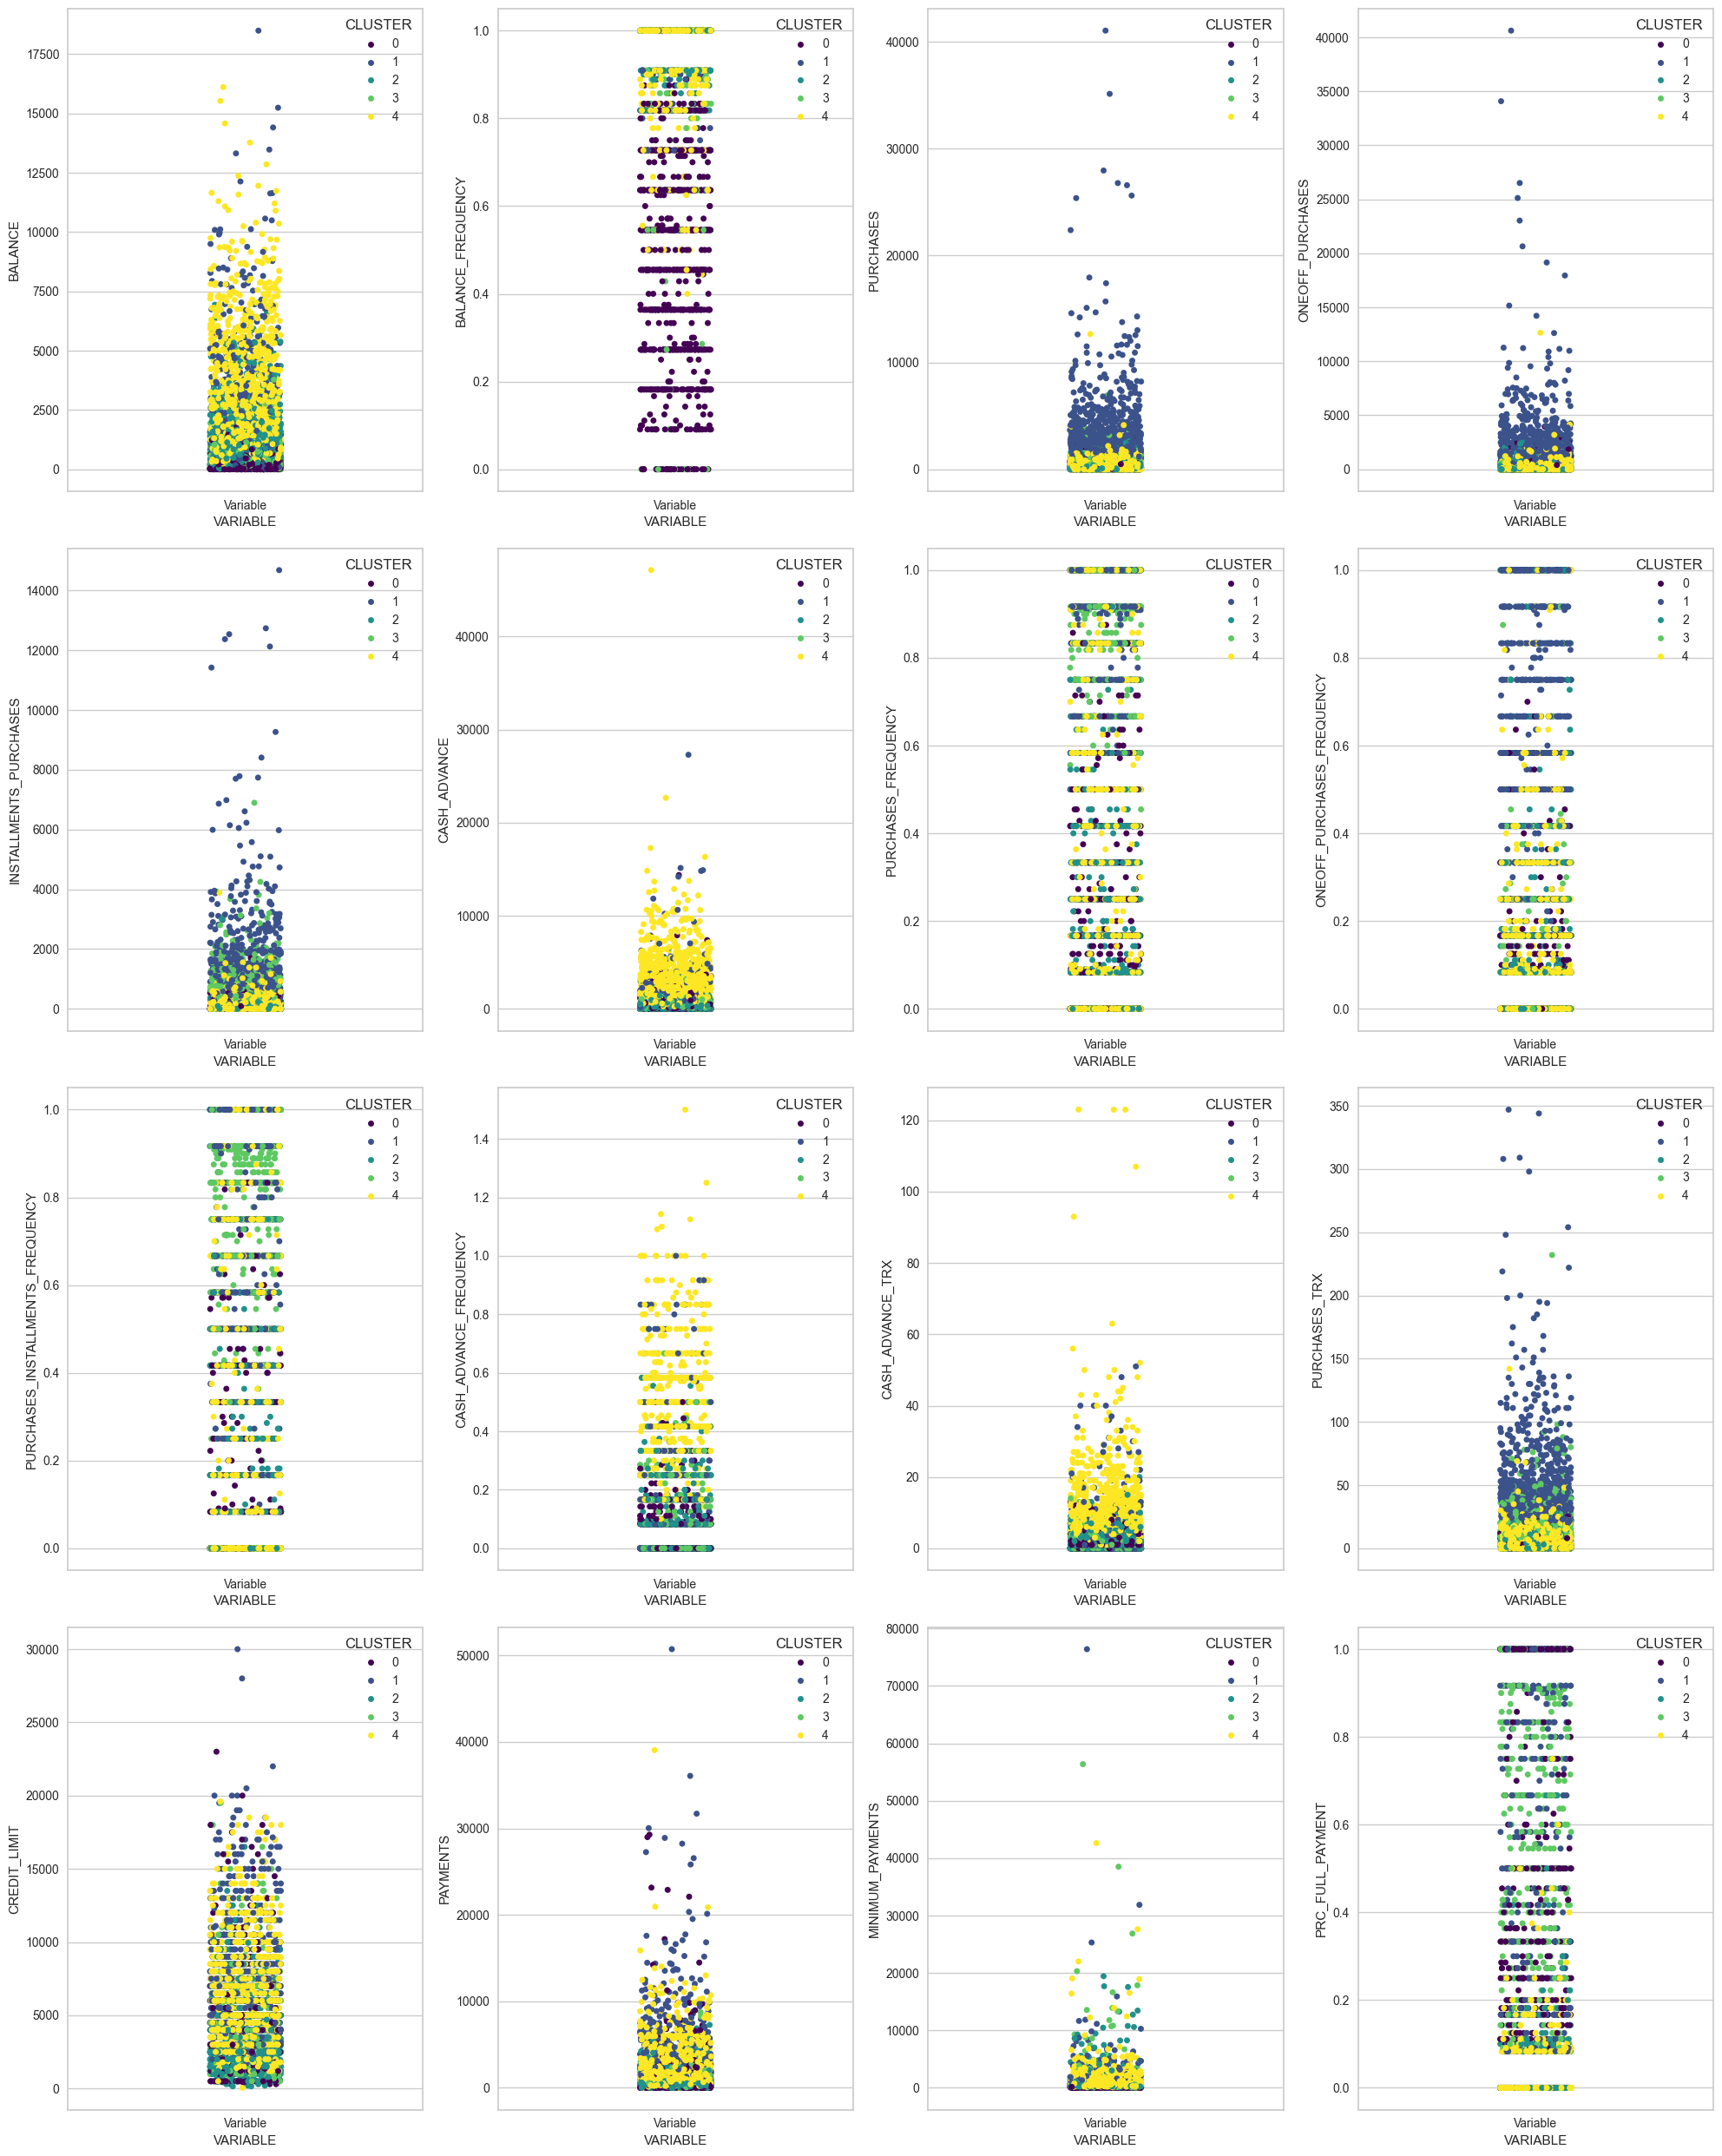

In [46]:
# Atur ukuran figure
plt.figure(figsize=(20, 25))

# Loop untuk membuat subplot
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    column_name = dataset.columns[i + 1]
    
    # Gunakan stripplot dari seaborn
    sns.stripplot(
        x=dataset['Variable'], 
        y=dataset[column_name], 
        data=dataset.iloc[1:], 
        ax=ax, 
        hue=dataset['CLUSTER'], 
        palette='viridis'
    )
    
    # Atur label sumbu x
    ax.set_xlabel('VARIABLE')

# Tampilkan plot
plt.tight_layout()
plt.show()

Scatter plot ini berguna untuk memvisualisasikan hubungan antara pembelian dan saldo menurut kluster. Analisa lebih lanjut mungkin diperlukan untuk menarik kesimpulan yang lebih kuat tentang hubungan antara kedua variabel tersebut.

**Melihat perseberan data dari 5 cluster yang kita pilih**

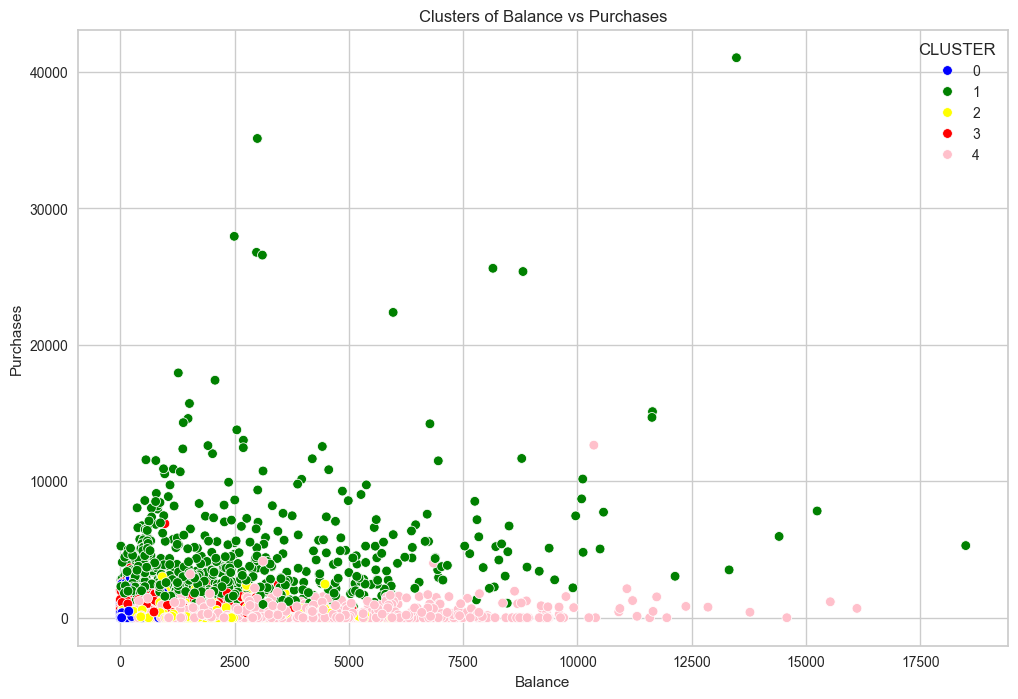

In [47]:
# Set ukuran gambar
plt.rcParams['figure.figsize'] = (12, 8)

# Plot scatter plot dengan menggunakan seaborn
sns.scatterplot(x='BALANCE', y='PURCHASES', data=dataset, hue='CLUSTER', palette=['blue', 'green', 'yellow', 'red', 'pink'])

# Menambahkan judul dan label sumbu
plt.title('Clusters of Balance vs Purchases')
plt.xlabel('Balance')
plt.ylabel('Purchases')

# Menampilkan plot
plt.show()

Scatter plot ini hanya untuk memvisualisasikan hubungan antara dua variabel. Analisa lebih lanjut mungkin diperlukan untuk menarik kesimpulan yang lebih kuat tentang hubungan antara kedua variabel tersebut.

**Melihat rata - rata purchases dari semua kolom**

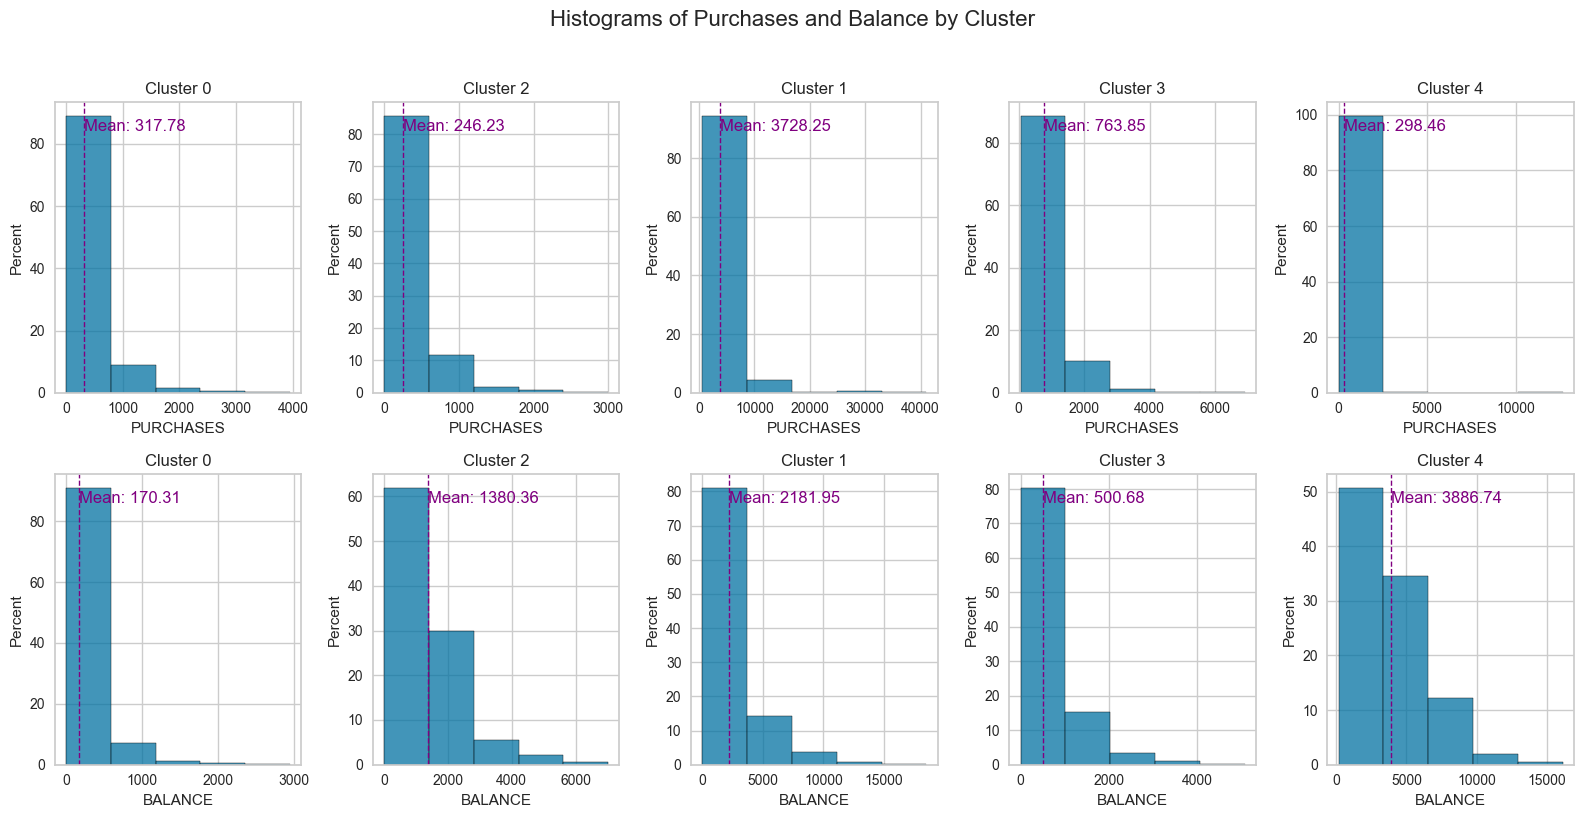

In [48]:
# Define the columns and clusters
cols = ['PURCHASES', 'BALANCE']
clusters = dataset['CLUSTER'].unique()

# Set up subplots
num_rows = len(cols)
num_cols = len(clusters)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows))

# Loop through each feature
for i, col in enumerate(cols):
    # Loop through each cluster
    for j, cluster in enumerate(clusters):
        # Select data points belonging to the current cluster
        data = dataset[dataset['CLUSTER'] == cluster][col]
        
        # Plot histogram for the current cluster in the current subplot
        sns.histplot(data, bins=5, ax=axes[i, j], stat='percent')
        axes[i, j].set_title(f'Cluster {cluster}')
        axes[i, j].set_xlabel(col)
        axes[i, j].set_ylabel('Percent')
        
        # Calculate mean
        mean_value = np.mean(data)
        
        # Annotate with mean value
        axes[i, j].axvline(mean_value, color='purple', linestyle='--', linewidth=1)
        axes[i, j].text(mean_value, axes[i, j].get_ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color='purple')

# Add overall title and adjust layout
plt.suptitle('Histograms of Purchases and Balance by Cluster', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


Terdapat lima histogram, masing-masing mewakili satu kluster (berlabel Cluster 0 sampai Cluster 4). Setiap histogram memiliki dua panel, yang menunjukkan distribusi pembelian dan saldo untuk kluster tersebut.
Distribusi pembelian:
- Secara umum, distribusi pembelian di semua kluster tampaknya miring ke kanan (positif), yang menunjukkan bahwa mungkin ada pembelian yang lebih sering terjadi pada nilai yang lebih rendah.
- Kluster 1 tampaknya memiliki pembelian tertinggi secara keseluruhan, dengan frekuensi tertinggi pada bin pembelian sekitar 2100 sampai 3800. Sebaliknya, - Kluster 3 tampaknya memiliki pembelian terendah secara keseluruhan, dengan frekuensi tertinggi pada bin pembelian sekitar 0 sampai 1000.

Distribusi saldo:
- Distribusi saldo di semua kluster tampaknya bervariasi.
- Kluster 2 dan 4 tampaknya memiliki saldo yang lebih rendah secara keseluruhan, dengan frekuensi tertinggi pada bin saldo mendekati 0.
- Kluster 0, 1, dan 3 tampaknya memiliki saldo yang lebih tinggi, dengan frekuensi tertinggi pada bin yang lebih tinggi pada skala saldo.

Namun, perlu dicatat bahwa interpretasi yang lebih detail mungkin memerlukan melihat nilai rata-rata (mean) yang tertera pada tiap panel histogram. Nilai rata-rata ini menunjukkan nilai rata-rata pembelian atau saldo untuk tiap kluster.
Selain itu, teks pada gambar  menunjukkan bahwa sumbu y pada histogram pembelian memiliki satuan "persen", sedangkan sumbu y pada histogram saldo memiliki satuan "persen".  Hal ini mungkin menunjukkan bahwa distribusi pembelian dan saldo telah dinormalisasi berdasarkan persentase.

---
**Kesimpulan**
- **Elbow Method** membantu menentukan jumlah cluster optimal, sementara **Silhouette Score** dan **Silhouette Plot** memberikan evaluasi kualitas clustering.

- Hasil clustering menggunakan KMeans membagi data menjadi 5 cluster yang berbeda dengan karakteristik yang cukup jelas, meskipun ada beberapa overlap.

- Scatter plot yang digunakan untuk memvisualisasikan hubungan antara pembelian dan saldo menurut kluster menunjukkan bahwa algoritma KMeans berhasil memisahkan data point berdasarkan karakteristik yang berbeda. Namun, analisis lebih lanjut diperlukan untuk mendalami hubungan antara kedua variabel tersebut.

- Histogram-histogram yang menampilkan distribusi pembelian dan saldo untuk setiap kluster menunjukkan pola distribusi yang bervariasi:
  - Secara umum, distribusi pembelian cenderung miring ke kanan (positif), menunjukkan adanya pembelian yang lebih sering pada nilai yang lebih rendah.
  - Kluster 1 memiliki pembelian tertinggi secara keseluruhan, sedangkan Kluster 3 memiliki pembelian terendah.
  - Distribusi saldo juga bervariasi antara kluster-keluster, dengan Kluster 2 dan 4 memiliki saldo lebih rendah, sementara Kluster 0, 1, dan 3 memiliki saldo lebih tinggi.

- Perlu dicatat bahwa satuan "persen" pada sumbu y histogram pembelian dan saldo menunjukkan normalisasi distribusi berdasarkan persentase dari total data dalam kluster tersebut.

# **x. Model Saving** 

In [49]:
with open('model.pkl', 'wb') as file_4:
  pickle.dump(km, file_4)

# Menyiman scaler
with open('scaler.pkl', 'wb') as Scaler:
  pickle.dump(scaler, Scaler)

# Menyimpan PCA
with open('pca.pkl', 'wb') as PCA:
  pickle.dump(pca, PCA)

In [50]:
#Model saving
with open('list_cols.txt', 'w') as file_1:
  json.dump(list(dataset1.columns), file_1)

# **xi. Model Inference** 

Model_Inference.iynb

# **xii. Kesimpulan** 

**Kesimpulan Bisnis:**

Melalui informasi dari analisis klaster ini, sebagai perusahaan kartu kredit, kita dapat lebih fokus dan efisien dalam mengalokasikan waktu dan sumber daya untuk kampanye pemasaran yang ditargetkan pada audiens yang tepat. Analisis menunjukkan bahwa pelanggan di klaster 1 dan 3 memiliki kapasitas belanja yang signifikan, dan karena mereka sudah aktif dalam berbelanja, kita dapat memanfaatkan kebiasaan belanja mereka untuk menyusun strategi pemasaran yang lebih efektif, dengan tujuan meningkatkan volume pembelian mereka.

Selain itu, analisis memberikan wawasan bahwa pelanggan dalam klaster 2 memiliki saldo dan batas kredit yang cukup besar, namun belum memanfaatkan kartu kredit mereka secara optimal. Oleh karena itu, diperlukan pendekatan yang lebih personal dan terarah untuk mendorong mereka agar lebih aktif menggunakan kartu kredit mereka. Dengan strategi yang tepat, kita dapat meningkatkan penggunaan kartu kredit di segmen ini, yang pada gilirannya akan meningkatkan pendapatan dan loyalitas pelanggan.

Secara keseluruhan, analisis klaster ini memberikan dasar yang kuat untuk mengembangkan strategi pemasaran yang lebih cerdas dan terukur, memastikan bahwa setiap segmen pelanggan mendapat pendekatan yang sesuai dengan kebutuhan dan kebiasaan mereka. Ini tidak hanya akan meningkatkan efektivitas kampanye pemasaran, tetapi juga akan memperkuat hubungan dengan pelanggan, menciptakan pengalaman yang lebih memuaskan dan meningkatkan nilai pelanggan seumur hidup.

**Kesimpulan Model:**

Clustering yang dilakukan berhasil mengklasifikasikan data menjadi 5 cluster. Namun, dari hasil visualisasi, pembagian data points ke dalam kluster masih belum rapi, di mana terlihat bahwa beberapa data points masih tumpang tindih (overlapping). Selain itu, pembagian klusternya juga belum optimal, tampak jarak antar kluster yang cukup berdekatan.

Ada beberapa faktor yang dapat mempengaruhi kondisi ini:

1. **Relevansi Fitur:** Fitur-fitur yang digunakan untuk clustering mungkin tidak cukup relevan atau memadai untuk memisahkan data dengan baik. Penting untuk melakukan seleksi fitur yang lebih baik atau mungkin menambahkan fitur-fitur baru yang lebih informatif.

2. **Pemilihan Algoritma:** Algoritma clustering yang digunakan mungkin tidak cocok dengan struktur data yang ada. Mungkin perlu mempertimbangkan untuk mencoba algoritma clustering alternatif seperti K-Means++, Hierarchical Clustering, atau DBSCAN yang mungkin lebih sesuai.

3. **Normalisasi Data:** Data mungkin memerlukan normalisasi atau standarisasi agar setiap fitur memiliki skala yang sama. Ketidakseimbangan skala antar fitur bisa menyebabkan algoritma clustering tidak bekerja secara optimal.

4. **Dimensionalitas Data:** Dimensionalitas data yang tinggi bisa menjadi tantangan dalam clustering. Teknik pengurangan dimensi seperti PCA (Principal Component Analysis) atau t-SNE bisa dipertimbangkan untuk mengurangi jumlah fitur sebelum melakukan clustering.

5. **Parameter Algoritma:** Parameter yang digunakan dalam algoritma clustering mungkin memerlukan penyesuaian lebih lanjut. Misalnya, dalam K-Means, jumlah cluster (k) yang dipilih mungkin tidak tepat, sehingga perlu dilakukan eksperimen dengan berbagai nilai k untuk menemukan yang terbaik.

Dengan memperhatikan faktor-faktor tersebut dan melakukan iterasi yang lebih mendalam, diharapkan hasil clustering dapat lebih optimal dan pembagian data points ke dalam kluster bisa lebih rapi serta jelas.

# Conceptual Problems

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

Suatu metrik yang digunakan untuk mengevaluasi seberapa baik model K-Means memisahkan data ke dalam kluster-klusternya. Inertia dalam K-Means memberikan informasi yang berguna tentang seberapa baik data tersebar di sekitar pusat-pusat kluster. Metrik ini mengukur jarak antara setiap titik data dan pusat kluster terdekatnya, sehingga semakin kecil nilai inertia, semakin dekat titik-titik data tersebut ke pusat klusternya, yang menandakan klustering yang lebih baik.

Secara teknis, inertia dihitung sebagai jumlah kuadrat jarak antara setiap titik data dan pusat kluster terdekat. Dengan kata lain, inertia merupakan total variansi dalam kluster, dan tujuannya adalah untuk meminimalkan nilai inertia ini selama proses klustering.

Namun, inertia memiliki beberapa keterbatasan. Salah satunya adalah bahwa metrik ini tidak sensitif terhadap keberadaan outlier. Outlier adalah titik data yang secara signifikan berbeda dari titik data lainnya dalam kluster. Karena inersia lebih fokus pada jarak rata-rata dalam kluster, keberadaan beberapa outlier tidak akan mempengaruhi nilai inersia secara signifikan. Akibatnya, model K-Means mungkin masih menghasilkan nilai inersia yang rendah meskipun terdapat outlier yang mengindikasikan klustering yang kurang optimal.

Selain itu, inertia cenderung menurun seiring dengan bertambahnya jumlah kluster. Oleh karena itu, memilih jumlah kluster yang tepat menjadi penting untuk mendapatkan hasil klustering yang optimal. Pendekatan umum untuk menentukan jumlah kluster yang optimal adalah dengan menggunakan metode "elbow", di mana grafik inersia diplot terhadap jumlah kluster, dan titik di mana penurunan inersia mulai melambat secara signifikan dianggap sebagai jumlah kluster yang optimal.

Secara keseluruhan, meskipun inertia adalah metrik yang berguna dalam mengevaluasi performa klustering K-Means, penggunaannya harus diimbangi dengan pertimbangan lain dan analisis tambahan untuk memastikan hasil klustering yang benar-benar representatif.

--------

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

Elbow Method adalah metode yang digunakan untuk menentukan jumlah klaster optimal dalam algoritma K-Means. Metode ini didasarkan pada plot inertia terhadap jumlah klaster yang digunakan untuk clustering. Tujuan utama dari Elbow Method adalah menemukan titik pada plot di mana penurunan inertia melambat secara signifikan, yang menunjukkan bahwa penambahan klaster tidak lagi memberikan peningkatan signifikan dalam pemisahan data.

Cara penggunaannya adalah dengan membuat plot nilai inertia terhadap jumlah klaster dan mencari titik di mana plot membentuk siku, menunjukkan jumlah klaster optimal. Kelebihan dari Elbow Method adalah kesederhanaannya dan kemudahan dalam implementasi untuk menentukan jumlah klaster optimal. Namun, kekurangannya adalah sulit untuk secara jelas menentukan titik di mana plot membentuk siku.

--------